# **Group Work Project 1 of Risk Management**

| Student Group  | 8183             |
|---------------|------------------|
| Team member A | Ebenezer Yeboah  |
| Team member B | Christson Hartono|
| Team member C | Eric Walter Pefura-Yone  |


In [2]:
import sys
import subprocess

# List of required packages
required_packages = [
    'fredapi',
    'eia',
    'pyampute',
    'yfinance',
    'matplotlib',
    'seaborn',
    'missingno',
    'scikit-learn',
    'scipy'
]

# Install packages if not already installed
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Import libraries after installation
import requests
import json
import time
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pyampute.exploration.mcar_statistical_tests import MCARTest

from sklearn.impute import KNNImputer
from scipy.stats import kurtosis, skew
import math

# Parameters to format title output for plots
bold_text = "\033[1m"
reset_format = "\033[0m"

print("All packages installed and ready!")


Installing fredapi...
Installing eia...
Installing pyampute...
Installing scikit-learn...
All packages installed and ready!


## **Step 2: Overview**

### **a.Problem identification (Alvi)**

The thesis attempts to solve several important issues related to the prediction of crude oil prices in the real world. The key problem being tackled here is the complex and unpredictable nature of the oil markets which are clearly influenced by macroeconomics, microeconomic, and geopolitical factors. The volatile nature of the prices of oil has made it necessary to find means to accurately predict its movement for relevant stakeholders such as traders, managers, and even shareholders to make decisions.
It is clearly highlighted in the thesis that it is difficult to learn the structure of the oil market. The traditional method, which has always relied on expert knowledge and related it to various available datasets, is both time-consuming and prone to errors. A new approach is proposed by the thesis which is using the Bayesian Probabilistic Graphical Models (PGMs) that can autonomously learn the relationship that exists between different market factors without necessarily needing expert intervention. The evolving nature of the oil market has made this a significant thing necessitating a flexible model that can adapt to new information and changing market conditions.
Also, this research talks about the challenges in data exploration and exploitation. As clearly seen, the oil market is characterized by a vast amount of data which includes economic indicators, levels of production, and geopolitical events. The thesis also explains the importance of effectively analyzing data to extract or derive insights that can help predict prices. Through the use of computational finance and machine learning methodologies, the research aims to improve the predictive accuracy of the oil price forecast which concludes as a valuable tool for traders and investors.
Lastly, there is also the validation of the constructed models in the thesis. For this model to be relevant (useful in financial markets) it must be tested under various economic scenarios. For that matter, there is stress testing in the models to stimulate economic distress situations which assess their performance so that they can withstand real-world challenges.

### **b. Bayesian networks in forecasting crude oil prices (Alvi)**

Bayesian networks are well suited to forecasting commodity prices, including crude oil prices. These networks are capable of modeling volatile energy markets due to their ability to model complex causal relationships, integrate heterogeneous data and handle uncertainties and missing data. 
Modeling Complex Relationships: The Bayesian networks help in analyzing complex relationships under macroeconomic, microeconomics, and geopolitical areas that ultimately affect crude oil prices. As it is well known that the oil market is not influenced by a single variable but rather a web of interconnected factors which includes demand and supply dynamics, geopolitical events, economic indicators, and market sentiments. Using the Bayesian networks, one can graphically model these relationships making it easier to understand how these various factors interact and influence one another. For instance, a Bayesian network can help illustrate the changes in OPEC production levels which can affect global oil supply and in the long run affect prices.
Handling Uncertainty: With the high level of uncertainty in the oil market as a result of the volatility of prices and the unpredictability of external factors which includes natural disasters and geopolitical tensions, the Bayesian network excels in environments where there is a high level of uncertainty. The Bayesian network allows for the incorporation of uncertainty in the form of probability distributions which enables the model to quantify the likelihood of various outcomes based on the available data. For instance, a Bayesian network can provide a range of possible prices along with their associated probabilities rather than a deterministic forecast.
Learning from Data: This thesis also emphasized the importance of the learning structure of the oil market through data analysis. Through the Bayesian framework, the automatic learning of relationships among or between various variables from the data is facilitated. The ability of the Bayesian network to learn the data means it can evolve and improve over time to make it more accurate as it is exposed to new information.
Incorporating Prior Knowledge: The Bayesian network has the ability to incorporate prior knowledge and opinions from experts in the modeling process. Narrowing it down to crude oil, this means that historical data, insights from experts as well as established economic theories can be integrated into the model to improve or enhance its predictive power. This is important because knowledge from experts and historical data or trends can help improve results from the prediction.
Validation and Robustness: The Bayesian network can be subject to testing through some techniques like cross-validation and stress testing. Its performance can be assessed well under different conditions which helps in ensuring a robust system enough to be deployed in the financial markets.

### **c. Advantages of using Bayesian network (Alvi)**

Several advantages come with the usage of the Bayesian network in forecasting crude oil prices. This advantage defines it as a better methodology as compared to the traditional way of forecasting oil prices.
Effective Management of Uncertainty: It has been earlier established that the oil market is characterized by a high level of uncertainty that stems from natural disasters, economic fluctuations, and geopolitical tensions. Systematically, the Bayesian network inherently uses probability to manage uncertainty. It generates a range of possible outcomes of which each is associated with a probability. For example, the Bayesian network can provide a forecast of future oil prices along with the likelihood of the various price levels occurring which is important for risk management.
Incorporation of Prior Knowledge:  The Bayesian network has the ability to incorporate prior knowledge and expert opinion which is being used in the traditional way of predicting the oil prices on the market. Nonetheless, historical data or trends can also be incorporated into the Bayesian network which is equally relevant for understanding the current dynamics of the market. The Bayesian network makes use of the Bayes theorem to give updates on the various probabilities of the prices whenever there is new data. This adaptability can be said to be very crucial in the fast-paced world of trading oil where conditions can change rapidly and significantly therefore, timely information is essential in making sound decisions.
Facilitating Decision-Making:  Ultimately, the importance of the Bayesian network for forecasting crude oil prices culminates in its ability to facilitate decision-making. Through a comprehensive understanding of the various factors that influence oil prices, incorporating prior knowledge as earlier discussed, quantifying uncertainties, and the use of new data, the Bayesian network empowers traders, investors and policymakers to make better decisions in the complex and volatile oil market.

## **Step 3: Identify, import, structure, and graph data**

Given that several types of data may be available from the same data provider, we have written 3 main functions to import and structure macroeconomic data (Student A), geopolitical data (Student A), microeconomic data (Student B) and financial data (Student C) for the period from January 1995 to December 2024. These functions are described and developed in this notebook according to the APIs used. We have used the APIs of the Energy Information Administration(EIA), Federal Reserve Economic Data(FRED), World Bank, Economic Policy Uncertainty(EPU), European Central Bank and Yahoo Finance.
The definitions and descriptions of the variables are given in the data dictionary (Table 1) and the table of variables (Table 2).
All the data were then combined into a single data table. In the combined data table, the USD/EUR exchange rate was not available for the period 1995 to 1998 (the European currency only came into effect in 1999).



## **a. Retrieve data from EIA, FRED, YAHOO and EPU**

In [3]:
# Configuration for EIA
EIA_API_KEY = 'cSna7VHKkAUC8clFBVNODsCqM7dqSz5v1LLstoQn'  # Replace with your EIA API key
EIA_DATASET_IDS = [
    'STEO.PAPR_NONOPEC.M',
    'STEO.PAPR_OPEC.M',
    'STEO.PATC_OECD.M',
    'STEO.PATC_NON_OECD.M',
    'STEO.COPRPUS.M',
    'STEO.CORIPUS.M',
    'PET.MCRIMXX2.M',
    'STEO.PASC_OECD_T3.M',
    'STEO.COPS_OPEC.M',
    'STEO.COPC_OPEC.M',
    'STEO.T3_STCHANGE_OOECD.M',
    'STEO.T3_STCHANGE_NOECD.M'
]
EIA_BASE_URL = "https://api.eia.gov/v2/seriesid/"

# Configuration for FRED
FRED_API_KEY = 'd988e5b6450e644cd92ca6c32941a0e6'
FRED_SERIES = ['CPIENGSL', 'CAPG211S', 'CAPUTLG211S', 'IPG211S',
               'IPG211111CN', 'INDPRO', 'IPN213111N', 'PCU211211', 'WTISPLC']

# Fetch EIA data
def fetch_eia_data():
    """Retrieve all EIA datasets and return structured results"""
    results = {}

    for series_id in EIA_DATASET_IDS:
        url = f"{EIA_BASE_URL}{series_id}?api_key={EIA_API_KEY}"

        for attempt in range(3):  # Retry up to 3 times
            try:
                response = requests.get(url)
                response.raise_for_status()
                data = response.json()

                results[series_id] = {
                    'status': 'success',
                    'response': data
                }

                print(f"✅ Successfully retrieved {series_id}")
                break  # Exit retry loop on success

            except requests.exceptions.HTTPError as err:
                if attempt == 2:  # Final attempt
                    results[series_id] = {
                        'status': 'error',
                        'error': f"HTTP Error: {err}",
                        'url': url
                    }
                    print(f"❌ Failed to retrieve {series_id}: HTTP Error")
                time.sleep(2)  # Wait before retrying

            except requests.exceptions.RequestException as err:
                if attempt == 2:  # Final attempt
                    results[series_id] = {
                        'status': 'error',
                        'error': f"Request Failed: {err}",
                        'url': url
                    }
                    print(f"❌ Failed to retrieve {series_id}: Connection Error")
                time.sleep(2)  # Wait before retrying

        time.sleep(1)  # Respect rate limits

    return results

# Clean EIA data
def clean_eia_data(raw_data):
    """Transform raw EIA API responses into a clean DataFrame"""
    cleaned_records = []

    for series_id, result in raw_data.items():
        if result['status'] != 'success':
            continue

        try:
            # Extract metadata
            meta = result['response']['response']
            freq = meta.get('frequency', 'unknown')
            date_format = meta.get('dateFormat', 'YYYY-MM')

            # Process data points
            for point in meta['data']:
                record = {
                    'series_id': series_id,
                    'period': point['period'],
                    'value': float(point['value']) if point['value'] else None,
                    'frequency': freq,
                    'units': meta.get('units', ''),
                    'date_format': date_format
                }

                # Convert period to datetime
                try:
                    if '-' in record['period']:
                        record['datetime'] = datetime.strptime(record['period'], '%Y-%m')
                    else:
                        record['datetime'] = datetime.strptime(record['period'], '%Y')
                except:
                    record['datetime'] = None

                cleaned_records.append(record)

        except KeyError as e:
            print(f"Skipping {series_id} - missing key: {e}")
            continue

    # Create DataFrame
    df = pd.DataFrame(cleaned_records)

    # Add categorical types
    df['frequency'] = df['frequency'].astype('category')
    df['series_id'] = df['series_id'].astype('category')

    # Sort by series and datetime
    df = df.sort_values(['series_id', 'datetime']).reset_index(drop=True)

    return df

# Fetch FRED data
def fetch_fred_data():
    """Retrieve FRED data from API"""
    data_dict = {}

    for series_id in FRED_SERIES:
        url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={FRED_API_KEY}&file_type=json"

        try:
            response = requests.get(url)
            response.raise_for_status()
            raw_data = response.json()

            # Convert to DataFrame
            df = pd.DataFrame(raw_data['observations'])
            df = df[['date', 'value']].rename(columns={'value': series_id})
            df['date'] = pd.to_datetime(df['date'])
            df[series_id] = pd.to_numeric(df[series_id], errors='coerce')

            data_dict[series_id] = df.set_index('date')

            print(f"✅ Retrieved {series_id} ({len(df)} observations)")
            time.sleep(1)  # Respect FRED API rate limits

        except Exception as e:
            print(f"❌ Failed to fetch {series_id}: {str(e)}")
            continue

    return data_dict

# Process FRED data
def process_fred_data(data_dict):
    """Clean, align, and merge FRED datasets"""
    # Merge all series
    merged = pd.concat([df for df in data_dict.values()], axis=1)

    # Convert numeric values
    merged = merged.apply(pd.to_numeric, errors='coerce')

    # Handle missing values
    processed = (
        merged
        .ffill(limit=3)  # Forward fill short gaps
        .interpolate(method='time')  # Temporal interpolation
        .ffill()  # Final forward fill
        .fillna(0)  # Handle remaining NAs
    )

    # Ensure regular monthly frequency
    full_index = pd.date_range(
        start=processed.index.min(),
        end=processed.index.max(),
        freq='MS'
    )

    return processed.reindex(full_index).ffill()

# Fetch GPR data
def fetch_gpr_data():
    """Retrieve Geopolitical Risk (GPR) dataset from URL and select only the GPR column."""
    url = "https://www.matteoiacoviello.com/gpr_files/data_gpr_export.xls"
    try:
        # Load the GPR dataset
        df_gpr = pd.read_excel(url, sheet_name='Sheet1')

        # Ensure the date column is named 'date'
        if 'date' not in df_gpr.columns:
            df_gpr = df_gpr.rename(columns={df_gpr.columns[0]: 'date'})

        # Convert the 'date' column to datetime
        df_gpr['date'] = pd.to_datetime(df_gpr['date'])

        # Select only the 'GPR' column (or the relevant column)
        if 'GPR' in df_gpr.columns:
            df_gpr = df_gpr[['date', 'GPR']]  # Keep only 'date' and 'GPR'
        else:
            print("⚠️ 'GPR' column not found in the dataset. Returning all columns.")

        # Set 'date' as the index
        df_gpr = df_gpr.set_index('date')

        print("✅ Successfully retrieved GPR data")
        return df_gpr
    except Exception as e:
        print(f"❌ Failed to fetch GPR data: {str(e)}")
        return pd.DataFrame()

# Fetch Yahoo Finance data

def fetch_yahoo_data():
    """Retrieve data from Yahoo Finance"""
    try:
        # Example: Fetch S&P 500 index data
        df_yahoo = yf.download('^GSPC', start='1900-01-01', end=datetime.today().strftime('%Y-%m-%d'), interval="1mo")
        if 'Adj Close' in df_yahoo.columns:
            df_yahoo = df_yahoo[['Adj Close']].rename(columns={'Adj Close': 'SP500'})
        else:
            df_yahoo = df_yahoo[['Close']].rename(columns={'Close': 'SP500'})
        df_yahoo.index = pd.to_datetime(df_yahoo.index)

        # Calculate returns
        df_yahoo['SP500_returns'] = df_yahoo['SP500'].pct_change()

        # Remove NaN values
        df_yahoo = df_yahoo.dropna()

        # Squeeze the DataFrame to return a Series
        print("✅ Successfully retrieved Yahoo Finance data")
        return df_yahoo['SP500_returns']  # Return the Series directly
    except Exception as e:
        print(f"❌ Failed to fetch Yahoo Finance data: {str(e)}")
        return pd.Series()  # Return an empty Series in case of an error


# Merge all datasets
def merge_datasets(eia_df, fred_df, gpr_df, yahoo_df):
    """Merge EIA, FRED, GPR, and Yahoo Finance datasets on datetime index"""
    # Ensure all datasets have a datetime index
    eia_df.index = pd.to_datetime(eia_df.index)
    fred_df.index = pd.to_datetime(fred_df.index)
    gpr_df.index = pd.to_datetime(gpr_df.index)
    yahoo_df.index = pd.to_datetime(yahoo_df.index)

    # Ensure all datasets have the same index frequency
    eia_df = eia_df.asfreq('MS')
    fred_df = fred_df.asfreq('MS')
    gpr_df = gpr_df.asfreq('MS')
    yahoo_df = yahoo_df.asfreq('MS')

    # Merge on datetime index
    merged_df = pd.concat([eia_df, fred_df, gpr_df, yahoo_df], axis=1)

    # Forward fill missing values
    #merged_df = merged_df.ffill().fillna(0)

    return merged_df


In [4]:
# main execution
if __name__ == "__main__":
    # Step 1: Fetch EIA data
    print("🚀 Starting EIA Data Retrieval")
    eia_raw_data = fetch_eia_data()

    # Step 2: Clean and transform EIA data
    print("\n🧹 Cleaning and transforming EIA data...")
    cleaned_eia_df = clean_eia_data(eia_raw_data)

    # Convert categorical columns to string or float
    cleaned_eia_df['series_id'] = cleaned_eia_df['series_id'].astype(str)
    cleaned_eia_df['frequency'] = cleaned_eia_df['frequency'].astype(str)

    # Pivot the EIA data to wide format
    eia_wide_df = cleaned_eia_df.pivot(index='datetime', columns='series_id', values='value')

    # Step 3: Fetch FRED data
    print("\n🚀 Fetching FRED data...")
    fred_data = fetch_fred_data()

    # Step 4: Process and merge FRED data
    print("\n🧹 Cleaning and merging FRED datasets...")
    final_fred_df = process_fred_data(fred_data)

    # Step 5: Fetch GPR data
    print("\n🌍 Fetching Geopolitical Risk (GPR) data...")
    gpr_df = fetch_gpr_data()

    # Step 6: Fetch Yahoo Finance data
    print("\n📈 Fetching Yahoo Finance data...")
    yahoo_df = fetch_yahoo_data()

    # Step 7: Merge all datasets
    print("\n🔧 Merging EIA, FRED, GPR, and Yahoo Finance datasets...")
    merged_df = merge_datasets(eia_wide_df, final_fred_df, gpr_df, yahoo_df)

    # Step 8: Add a shifted column for WTISPLC and rename it to forecast_oil_price
    print("\n➕ Adding 'forecast_oil_price' (shifted WTISPLC)...")
    merged_df['forecast_oil_price'] = merged_df['WTISPLC'].shift(-1)

    # Save merged data
    merged_df.to_csv('merged_eia_fred_gpr_yahoo_data.csv')

    # Step 9: Filter data for the last 30 years from the end of 2024
    print("\n📅 Filtering data for the last 30 years from the end of 2024...")
    end_date = datetime(2024, 12, 31)
    thirty_years_ago = end_date - timedelta(days=30.1*365)  # Corrected to 30 years
    merged_df.index = pd.to_datetime(merged_df.index)  # Ensure index is datetime
    filtered_df = merged_df[merged_df.index >= thirty_years_ago]

    # Rename the index to 'date'
    filtered_df.index.name = 'date'

    # Save filtered data
    filtered_df.to_csv('filtered_last_30_years_from_end_2024.csv')

    # Step 10: Show results
    print("\n📊 Final Merged Time Series (Monthly):")
    print(filtered_df.head())
    print("\n📈 Dataset Summary:")
    print(filtered_df.describe())
    print("\n💾 All data saved to CSV files.")

🚀 Starting EIA Data Retrieval
✅ Successfully retrieved STEO.PAPR_NONOPEC.M
✅ Successfully retrieved STEO.PAPR_OPEC.M
✅ Successfully retrieved STEO.PATC_OECD.M
✅ Successfully retrieved STEO.PATC_NON_OECD.M
✅ Successfully retrieved STEO.COPRPUS.M
✅ Successfully retrieved STEO.CORIPUS.M
✅ Successfully retrieved PET.MCRIMXX2.M
✅ Successfully retrieved STEO.PASC_OECD_T3.M
✅ Successfully retrieved STEO.COPS_OPEC.M
✅ Successfully retrieved STEO.COPC_OPEC.M
✅ Successfully retrieved STEO.T3_STCHANGE_OOECD.M
✅ Successfully retrieved STEO.T3_STCHANGE_NOECD.M

🧹 Cleaning and transforming EIA data...

🚀 Fetching FRED data...
✅ Retrieved CPIENGSL (816 observations)
✅ Retrieved CAPG211S (636 observations)
✅ Retrieved CAPUTLG211S (636 observations)
✅ Retrieved IPG211S (636 observations)
✅ Retrieved IPG211111CN (592 observations)
✅ Retrieved INDPRO (1272 observations)
✅ Retrieved IPN213111N (636 observations)
✅ Retrieved PCU211211 (469 observations)
✅ Retrieved WTISPLC (948 observations)

🧹 Cleaning an

[*********************100%***********************]  1 of 1 completed

✅ Successfully retrieved Yahoo Finance data

🔧 Merging EIA, FRED, GPR, and Yahoo Finance datasets...

➕ Adding 'forecast_oil_price' (shifted WTISPLC)...

📅 Filtering data for the last 30 years from the end of 2024...

📊 Final Merged Time Series (Monthly):
            PET.MCRIMXX2.M  STEO.COPC_OPEC.M  STEO.COPRPUS.M  \
date                                                           
1995-01-01          3301.0         27.797695        6.682180   
1995-02-01          3354.0         27.797695        6.794452   
1995-03-01          3754.0         27.797695        6.600412   
1995-04-01          3307.0         27.797695        6.603716   
1995-05-01          3487.0         27.797695        6.629316   

            STEO.COPS_OPEC.M  STEO.CORIPUS.M  STEO.PAPR_NONOPEC.M  \
date                                                                
1995-01-01          4.248843          13.604            43.848928   
1995-02-01          4.100883          13.365            44.103120   
1995-03-01         

### **b. Retrieve GDP for OECD and non-OECD From World Bank**

In [5]:
# World Bank API endpoint for GDP growth (annual %)
def fetch_world_bank_data(region_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{region_code}/indicator/NY.GDP.MKTP.KD.ZG?format=json&date={start_year}:{end_year}&per_page=20000"
    response = requests.get(url)
    data = response.json()
    return data

# Extract data from the API response
def extract_gdp_data(data, region_name):
    gdp_data = []
    for entry in data[1]:  # The second element in the JSON contains the data
        gdp_data.append({
            'year': int(entry['date']),
            region_name: entry['value']
        })
    return gdp_data

# Fetch OECD and non-OECD data
start_year = 1995
end_year = 2024

# OECD data
oecd_data = fetch_world_bank_data("OED", start_year, end_year)
oecd_gdp = extract_gdp_data(oecd_data, "OECD.GDP.GROWTH")

# Non-OECD data (aggregated regions)
non_oecd_regions = ["NAC", "EMU", "ECS", "LCN", "MEA", "SAS", "SSF"]
non_oecd_gdp = []
for region in non_oecd_regions:
    region_data = fetch_world_bank_data(region, start_year, end_year)
    non_oecd_gdp.extend(extract_gdp_data(region_data, "Non-OECD.GDP.GROWTH"))

# Convert to DataFrames
df_oecd = pd.DataFrame(oecd_gdp)
df_non_oecd = pd.DataFrame(non_oecd_gdp)

# Merge OECD and non-OECD data on 'year'
df_combined_gdp = pd.merge(df_oecd, df_non_oecd, on='year', how='outer')

# Drop rows with missing GDP growth values
df_combined_gdp = df_combined_gdp.dropna(subset=['OECD.GDP.GROWTH', 'Non-OECD.GDP.GROWTH'])

# Convert annual data to monthly frequency
def annual_to_monthly(df):
    # Create a date range from January 1995 to December 2024
    date_range = pd.date_range(start='1995-01-01', end='2024-12-31', freq='MS')

    # Create a DataFrame with the full date range
    full_df = pd.DataFrame({'date': date_range})

    # Convert 'year' to datetime and sort the GDP DataFrame
    df['date'] = pd.to_datetime(df['year'], format='%Y')
    df = df.sort_values('date')  # Sort by date

    # Merge with the annual GDP data
    merged_df = pd.merge_asof(full_df, df, on='date', direction='backward')

    return merged_df

# Convert annual GDP data to monthly frequency
df_monthly_gdp = annual_to_monthly(df_combined_gdp)
df_monthly_gdp = df_monthly_gdp.drop(columns=['year'])

# Display the first few rows
print(df_monthly_gdp.head())

# Save to CSV
df_monthly_gdp.to_csv('world_bank_gdp_growth_oecd_non_oecd_monthly.csv', index=False)


        date  OECD.GDP.GROWTH  Non-OECD.GDP.GROWTH
0 1995-01-01         2.684958             3.298926
1 1995-02-01         2.684958             3.298926
2 1995-03-01         2.684958             3.298926
3 1995-04-01         2.684958             3.298926
4 1995-05-01         2.684958             3.298926


## **c. Retrieve Exchange rates data from European Central Bank (ECB)**

In [6]:
# Function to fetch exchange rates from ECB API
def fetch_ecb_exchange_rates(start_date, end_date, base_currency='USD', target_currency='EUR'):
    # ECB API endpoint for exchange rates
    url = f"https://sdw-wsrest.ecb.europa.eu/service/data/EXR/M.{base_currency}.{target_currency}.SP00.A"

    # Parameters for the API request
    params = {
        'startPeriod': start_date,
        'endPeriod': end_date,
        'format': 'jsondata'
    }

    # Make the API request
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code != 200:
        raise Exception(f"Failed to fetch data: HTTP {response.status_code}")

    data = response.json()

    # Check if the response contains the expected data
    if 'dataSets' not in data or not data['dataSets']:
        raise KeyError(f"Unexpected API response structure. 'dataSets' not found or empty in: {data}")

    # Extract exchange rates
    exchange_rates = []
    for observation in data['dataSets'][0]['series']['0:0:0:0:0']['observations'].values():
        exchange_rates.append(float(observation[0]))

    # Extract dates
    dates = data['structure']['dimensions']['observation'][0]['values']
    dates = [entry['id'] for entry in dates]

    # Combine dates and exchange rates into a DataFrame
    df = pd.DataFrame({
        'date': pd.to_datetime(dates),
        'exchange_rate': exchange_rates
    })

    return df

# Fetch exchange rate data (USD to EUR) from 1999 to 2024
start_date = '1999-01-01'
end_date = '2024-12-31'
df_exchange_rates = fetch_ecb_exchange_rates(start_date, end_date, base_currency='USD', target_currency='EUR')

# Display the first few rows
print(df_exchange_rates.head())

# Save to CSV
df_exchange_rates.to_csv('ecb_exchange_rates_usd_eur.csv', index=False)


        date  exchange_rate
0 1999-01-01       1.160780
1 1999-02-01       1.120765
2 1999-03-01       1.088296
3 1999-04-01       1.070441
4 1999-05-01       1.062810


## **d. Merging the three datasets**

In [7]:
# filtered_df, df_monthly_gdp, and df_exchange_rates

# Convert the 'date' column to datetime format for all DataFrames
filtered_df.index = pd.to_datetime(filtered_df.index)
df_monthly_gdp['date'] = pd.to_datetime(df_monthly_gdp['date'])
df_exchange_rates['date'] = pd.to_datetime(df_exchange_rates['date'])

# Perform the outer merge
merged_df = pd.merge(filtered_df, df_monthly_gdp, how='outer', left_index=True, right_on='date')
merged_df = pd.merge(merged_df, df_exchange_rates, how='outer', on='date')

# Set the 'date' column as the index
merged_df.set_index('date', inplace=True)

# Sort the DataFrame by date
merged_df.sort_index(inplace=True)

# Select data from the first row until 31/12/2024
start_date = merged_df.index[0]  # First row's date
end_date = pd.to_datetime('2024-12-31')  # End date

# Filter the DataFrame
merged_df = merged_df.loc[start_date:end_date]

# Display the filtered DataFrame
merged_df.head(15)

# Save to csv
merged_df.to_csv('merged_df.csv', index=False)

In [34]:
# print dataset
merged_df

PET.MCRIMXX2.M  STEO.COPC_OPEC.M  STEO.COPRPUS.M  \
date                                                           
1995-01-01          3301.0         27.797695        6.682180   
1995-02-01          3354.0         27.797695        6.794452   
1995-03-01          3754.0         27.797695        6.600412   
1995-04-01          3307.0         27.797695        6.603716   
1995-05-01          3487.0         27.797695        6.629316   
...                    ...               ...             ...   
2024-08-01          1013.0         31.265000       13.363545   
2024-09-01          1011.0         30.883000       13.197900   
2024-10-01          1030.0         31.315000       13.456725   
2024-11-01             NaN         31.431000       13.327507   
2024-12-01             NaN         31.661000       13.510967   

            STEO.COPS_OPEC.M  STEO.CORIPUS.M  STEO.PAPR_NONOPEC.M  \
date                                                                
1995-01-01          4.248843       13.604000            43.848928   
1995-02-01          4.100883       13.365000            44.103120   
1995-03-01          4.478843       13.480000            43.641556   
1995-04-01          3.978843       13.817000            44.051765   
1995-05-01          3.468843       14.303000            43.531940   
...                      ...             ...                  ...   
2024-08-01          4.415000       16.838710            70.688921   
2024-09-01          4.713000       16.200567            70.445608   
2024-10-01          4.665000       16.120161            70.793594   
2024-11-01          4.756000       16.497067            70.717138   
2024-12-01          4.901000       16.767516            70.826098   

            STEO.PAPR_OPEC.M  STEO.PASC_OECD_T3.M  STEO.PATC_NON_OECD.M  \
date                                                                      
1995-01-01         25.993118                  NaN             24.302361   
1995-02-01         26.141078                  NaN             24.302191   
1995-03-01         25.763118                  NaN             24.302534   
1995-04-01         26.269972                  NaN             24.116910   
1995-05-01         26.786825                  NaN             24.116678   
...                      ...                  ...                   ...   
2024-08-01         32.209700          2833.201866             56.319908   
2024-09-01         31.839443          2798.594304             57.087643   
2024-10-01         32.318269          2790.394185             55.972472   
2024-11-01         32.342548          2777.859428             57.151193   
2024-12-01         32.426172          2766.129858             58.213118   

            STEO.PATC_OECD.M  ...    INDPRO  IPN213111N  PCU211211  WTISPLC  \
date                          ...                                             
1995-01-01         45.163522  ...   71.2635     83.3824     68.700    17.99   
1995-02-01         47.740446  ...   71.1758     78.8174     66.900    18.53   
1995-03-01         46.711554  ...   71.2796     72.1156     65.700    18.55   
1995-04-01         44.101673  ...   71.1538     72.6453     68.300    19.87   
1995-05-01         43.439845  ...   71.4997     78.9054     69.200    19.74   
...                      ...  ...       ...         ...        ...      ...   
2024-08-01         46.340969  ...  103.0135    101.7666    183.850    76.68   
2024-09-01         45.840065  ...  102.5969    102.1341    165.387    70.24   
2024-10-01         46.468960  ...  102.0854    101.0579    179.017    71.99   
2024-11-01         45.957485  ...  102.2549     99.1196    173.515    69.95   
2024-12-01         46.441113  ...  103.1942    100.1509    191.753    70.12   

                   GPR  SP500_returns  forecast_oil_price  OECD.GDP.GROWTH  \
date                                                                         
1995-01-01   80.154678       0.024278               18.53         2.684958   
1995-02-01   76.875328       0.036074      

### **e. Graphing data**

### **e.1. Graphing macroeconomic data**

       Figure 1: Time series of original macroeconomic data 



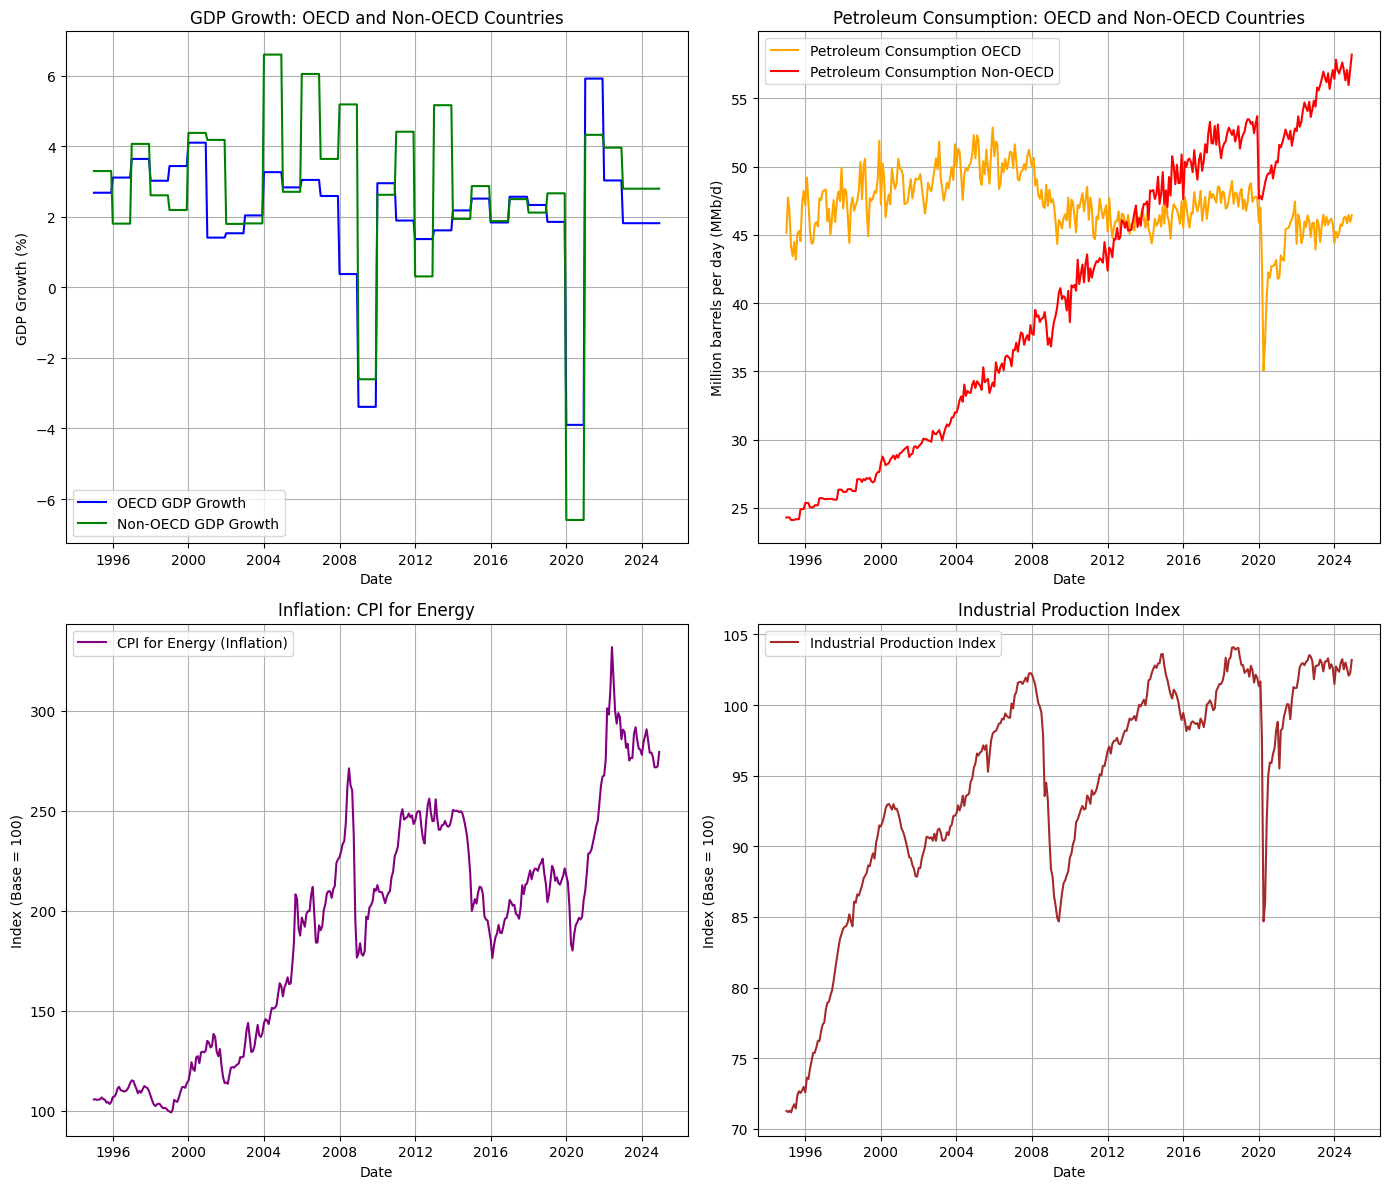

In [8]:
# Create a figure with 2 columns and 2 rows (4 subplots)
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Plot merged GDP Growth for OECD and Non-OECD in the first subplot
ax[0, 0].plot(merged_df.index, merged_df['OECD.GDP.GROWTH'], color='b', label='OECD GDP Growth')
ax[0, 0].plot(merged_df.index, merged_df['Non-OECD.GDP.GROWTH'], color='g', label='Non-OECD GDP Growth')
ax[0, 0].set_title('GDP Growth: OECD and Non-OECD Countries')
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('GDP Growth (%)')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Plot merged Petroleum Consumption in OECD and Non-OECD Countries in the second subplot
ax[0, 1].plot(merged_df.index, merged_df['STEO.PATC_OECD.M'], color='orange', label='Petroleum Consumption OECD')
ax[0, 1].plot(merged_df.index, merged_df['STEO.PATC_NON_OECD.M'], color='r', label='Petroleum Consumption Non-OECD')
ax[0, 1].set_title('Petroleum Consumption: OECD and Non-OECD Countries')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Million barrels per day (MMb/d)')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Plot Inflation (Consumer Price Index for energy) in the third subplot
ax[1, 0].plot(merged_df.index, merged_df['CPIENGSL'], color='purple', label='CPI for Energy (Inflation)')
ax[1, 0].set_title('Inflation: CPI for Energy')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Index (Base = 100)')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Plot Industrial Production Index in the fourth subplot
ax[1, 1].plot(merged_df.index, merged_df['INDPRO'], color='brown', label='Industrial Production Index')
ax[1, 1].set_title('Industrial Production Index')
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Index (Base = 100)')
ax[1, 1].legend()
ax[1, 1].grid(True)

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display the plots
print(f"{bold_text}       Figure 1: Time series of original macroeconomic data {reset_format}\n")
plt.show()


Figure 1 presents four macroeconomic time series from 1995 to 2024. It compares GDP growth in OECD and non-OECD countries, oil consumption in these two groups of countries, inflation via the energy CPI (consumer price index), and the industrial production index. The graphs illustrate the trends, volatilities and interactions between these key indicators over 30 years.

### **e.2. Graphing geopolitical data**

       Figure 2: Time series of original geopolitical data 



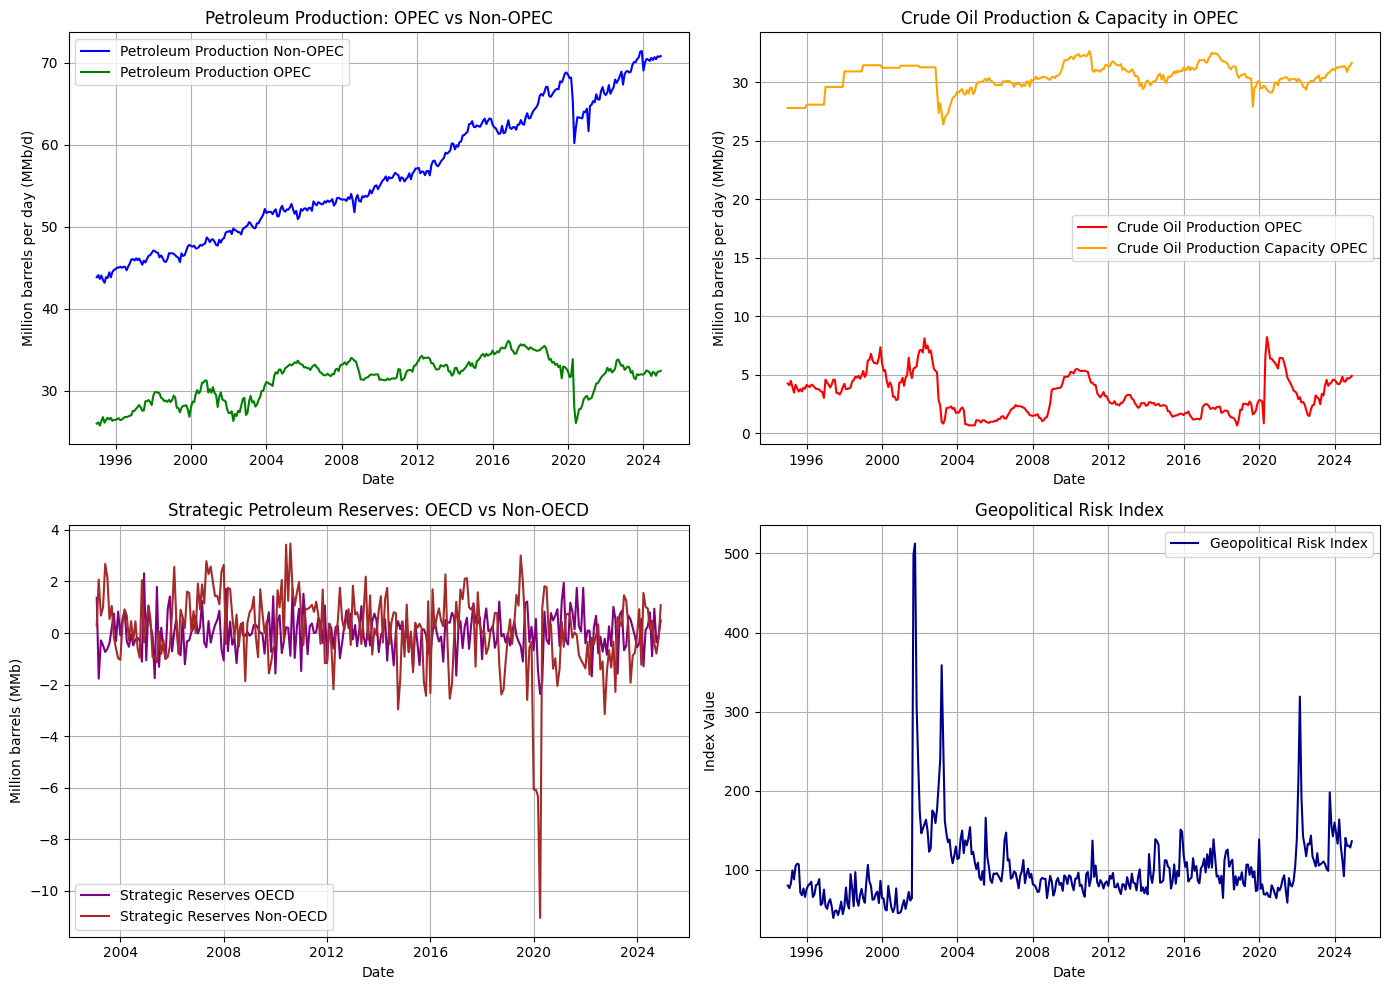

In [9]:
# Create a figure with 2 columns and 2 rows (4 subplots)
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot Petroleum Production (non-OPEC and OPEC) in the first subplot
ax[0, 0].plot(merged_df.index, merged_df['STEO.PAPR_NONOPEC.M'], color='blue', label='Petroleum Production Non-OPEC')
ax[0, 0].plot(merged_df.index, merged_df['STEO.PAPR_OPEC.M'], color='green', label='Petroleum Production OPEC')
ax[0, 0].set_title('Petroleum Production: OPEC vs Non-OPEC')
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Million barrels per day (MMb/d)')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Plot Crude Oil Production (OPEC countries) in the second subplot
ax[0, 1].plot(merged_df.index, merged_df['STEO.COPS_OPEC.M'], color='red', label='Crude Oil Production OPEC')
ax[0, 1].plot(merged_df.index, merged_df['STEO.COPC_OPEC.M'], color='orange', label='Crude Oil Production Capacity OPEC')
ax[0, 1].set_title('Crude Oil Production & Capacity in OPEC')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Million barrels per day (MMb/d)')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Plot Strategic Reserves (OECD vs Non-OECD) in the third subplot
ax[1, 0].plot(merged_df.index, merged_df['STEO.T3_STCHANGE_OOECD.M'], color='purple', label='Strategic Reserves OECD')
ax[1, 0].plot(merged_df.index, merged_df['STEO.T3_STCHANGE_NOECD.M'], color='brown', label='Strategic Reserves Non-OECD')
ax[1, 0].set_title('Strategic Petroleum Reserves: OECD vs Non-OECD')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Million barrels (MMb)')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Plot Geopolitical Risk in the fourth subplot
ax[1, 1].plot(merged_df.index, merged_df['GPR'], color='darkblue', label='Geopolitical Risk Index')
ax[1, 1].set_title('Geopolitical Risk Index')
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Index Value')
ax[1, 1].legend()
ax[1, 1].grid(True)

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display the plots
print(f"{bold_text}       Figure 2: Time series of original geopolitical data {reset_format}\n")
plt.show()


Figure 2 shows the geopolitical dynamics related to oil from 1995 to 2024. OPEC countries’ production fluctuates with geopolitical tensions while production capacity largely exceeds actual production. In addition, strategic reserves of non-OECD countries vary greatly as they are impacted by global financial and health crises. The Geopolitical Risk Index (GPR) peaks during major events such as the Russo-Ukrainian war.

### **e.3. Graphing microeconomic data**

      Figure 3: Time series of original microeconomic data 



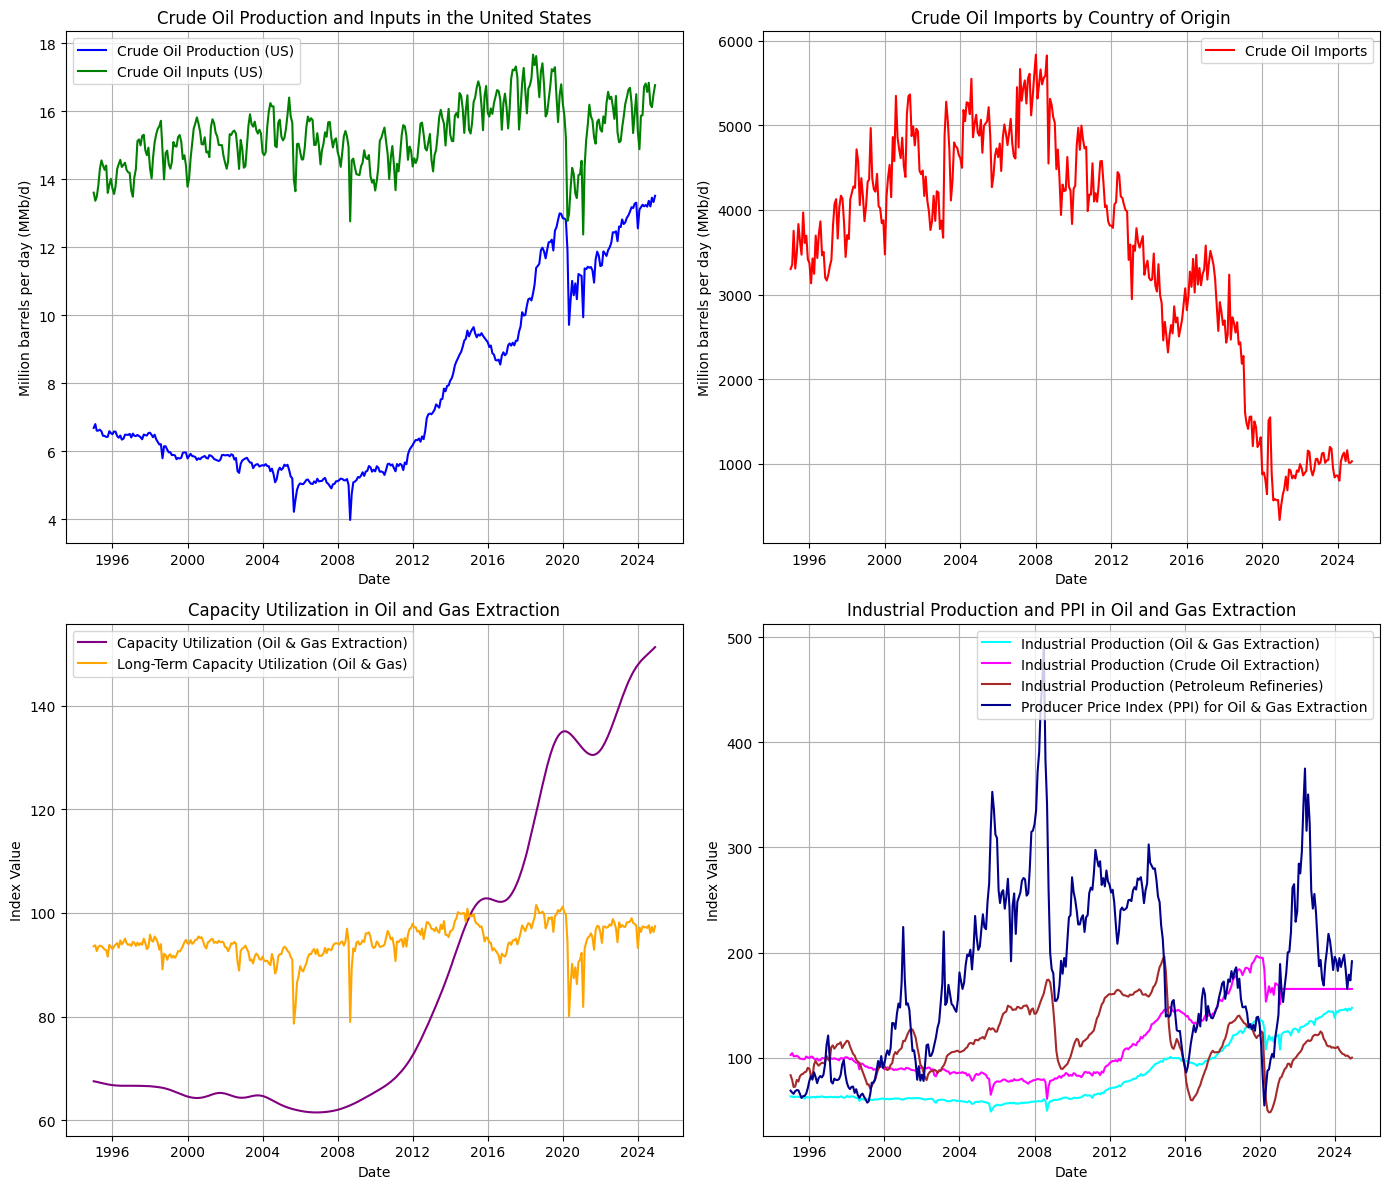

In [10]:
# Create a figure with 2 columns and 2 rows (4 subplots)
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Plot Crude Oil Production and Crude Oil Inputs in the first subplot
ax[0, 0].plot(merged_df.index, merged_df['STEO.COPRPUS.M'], color='blue', label='Crude Oil Production (US)')
ax[0, 0].plot(merged_df.index, merged_df['STEO.CORIPUS.M'], color='green', label='Crude Oil Inputs (US)')
ax[0, 0].set_title('Crude Oil Production and Inputs in the United States')
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Million barrels per day (MMb/d)')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Plot Crude Oil Imports in the second subplot
ax[0, 1].plot(merged_df.index, merged_df['PET.MCRIMXX2.M'], color='red', label='Crude Oil Imports')
ax[0, 1].set_title('Crude Oil Imports by Country of Origin')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Million barrels per day (MMb/d)')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Plot Capacity Utilization in the third subplot
ax[1, 0].plot(merged_df.index, merged_df['CAPG211S'], color='purple', label='Capacity Utilization (Oil & Gas Extraction)')
ax[1, 0].plot(merged_df.index, merged_df['CAPUTLG211S'], color='orange', label='Long-Term Capacity Utilization (Oil & Gas)')
ax[1, 0].set_title('Capacity Utilization in Oil and Gas Extraction')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Index Value')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Plot Industrial Production and Producer Price Index in the fourth subplot
ax[1, 1].plot(merged_df.index, merged_df['IPG211S'], color='cyan', label='Industrial Production (Oil & Gas Extraction)')
ax[1, 1].plot(merged_df.index, merged_df['IPG211111CN'], color='magenta', label='Industrial Production (Crude Oil Extraction)')
ax[1, 1].plot(merged_df.index, merged_df['IPN213111N'], color='brown', label='Industrial Production (Petroleum Refineries)')
ax[1, 1].plot(merged_df.index, merged_df['PCU211211'], color='darkblue', label='Producer Price Index (PPI) for Oil & Gas Extraction')
ax[1, 1].set_title('Industrial Production and PPI in Oil and Gas Extraction')
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Index Value')
ax[1, 1].legend()
ax[1, 1].grid(True)

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display the plots
print(f"{bold_text}      Figure 3: Time series of original microeconomic data {reset_format}\n")
plt.show()


Figure 3 shows microeconomic oil data covering the period 1995-2024. We can note that US production and imports vary according to economic cycles. Capacity utilization (oil extraction) shows a decline after the 2008 crisis and a recovery after COVID. Industrial production indices reflect supply shocks (e.g. 2020 crisis) and increasing demand from refineries.

### **e.1. Graphing financial data**

        Figure 4: Time series of original financial data 



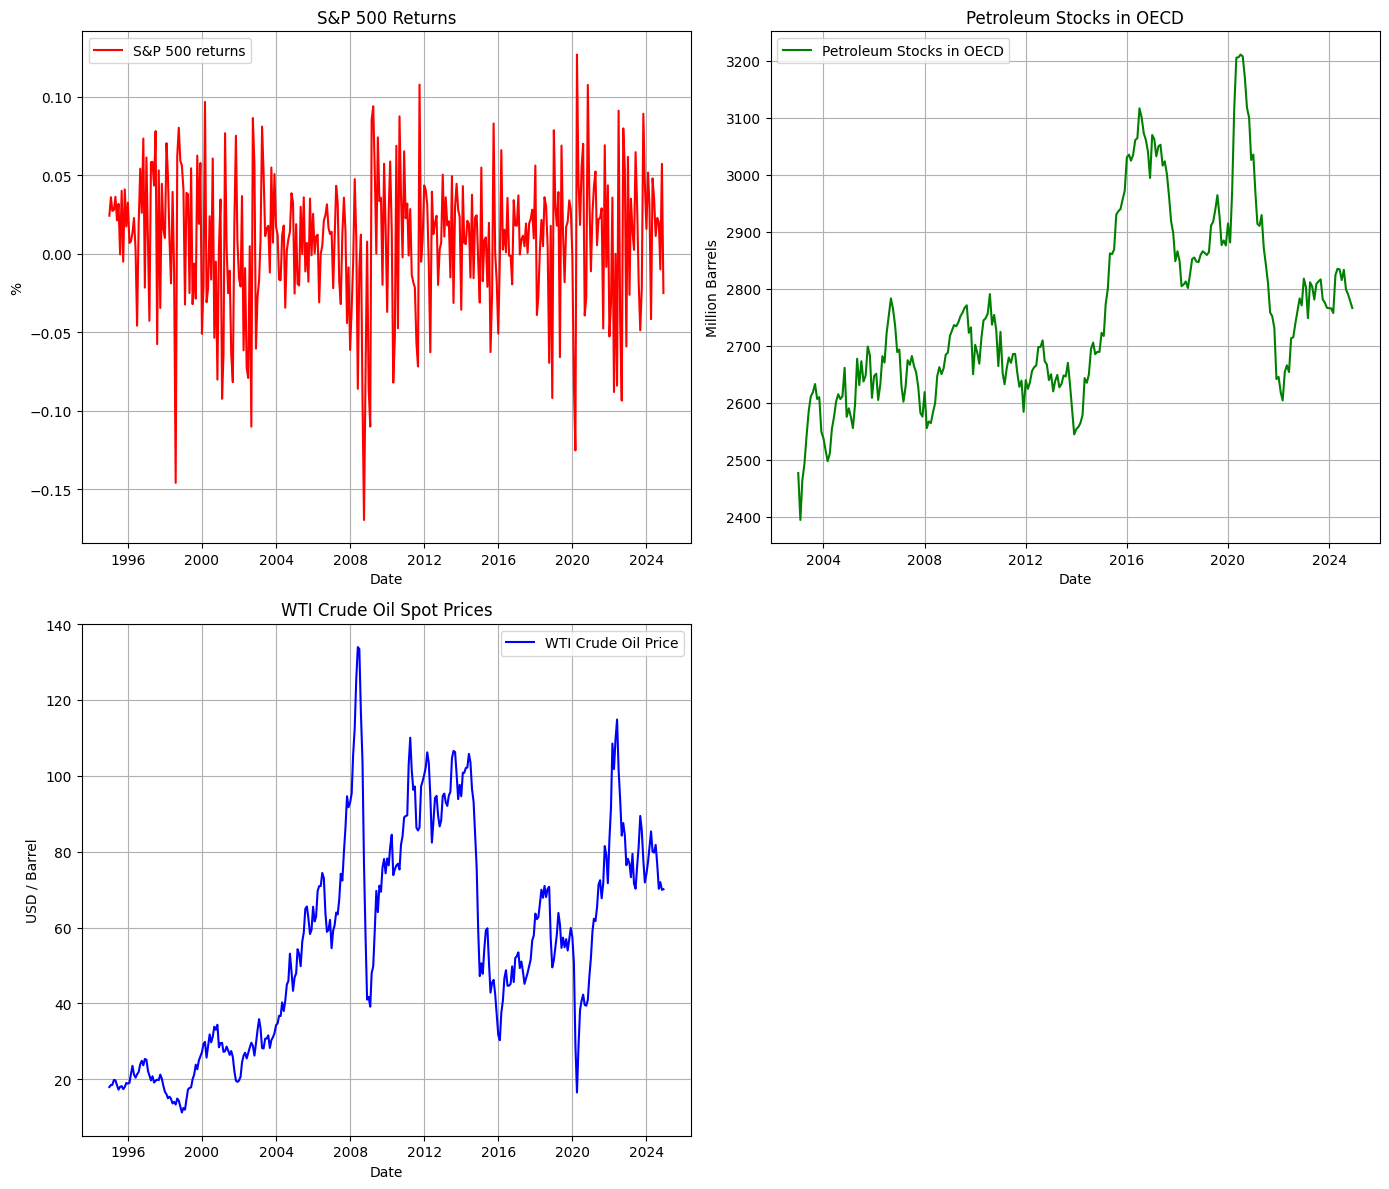

In [11]:
# Create a figure with 2 rows and 2 columns (4 subplots)
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Plot S&P 500 Returns in the first subplot
ax[0, 0].plot(merged_df.index, merged_df['SP500_returns'], color='red', label='S&P 500 returns')
ax[0, 0].set_title('S&P 500 Returns')
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('%')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Plot Petroleum Stocks in the second subplot
ax[0, 1].plot(merged_df.index, merged_df['STEO.PASC_OECD_T3.M'], color='green', label='Petroleum Stocks in OECD')
ax[0, 1].set_title('Petroleum Stocks in OECD')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Million Barrels')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Plot WTI Crude Oil Price in the third subplot
ax[1, 0].plot(merged_df.index, merged_df['WTISPLC'], color='blue', label='WTI Crude Oil Price')
ax[1, 0].set_title('WTI Crude Oil Spot Prices')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('USD / Barrel')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Empty subplot (keep it empty for now)
ax[1, 1].axis('off')

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display the plots
print(f"{bold_text}        Figure 4: Time series of original financial data {reset_format}\n")
plt.show()


Financial data (1995-2024) are shown in Figure 4. S&P500 returns show high volatility during the 2008 and COVID19 crises. The variation in the price of WTI crude oil indicates the presence of peaks and crashes. S&P 500 returns show increased volatility during crises (2008, COVID). WTI oil price experiences peaks (2008, 2022) and crashes (2020). OECD oil stocks track supply shocks.

## **Step 4: Data dictionary and Data table**

### **a. Data Dictionary**

The data dictionary is presented in Table 1. The macroeconomic, geopolitical, microeconomic and financial variables are presented in this table.

**Table 1: Data dictionary**


| **Type**         | **Sub-Type**               | **Dataset ID**          | **Description**                                                                 |
|-------------------|----------------------------|--------------------------|---------------------------------------------------------------------------------|
| **Macroeconomic** | GDP Growth                | `OECD.GDP.GROWTH`   | Real GDP for OECD countries (quarterly, monthly data).                      |
|                   | GDP Growth                | `Non-OECD.GDP.GROWTH`      | Real GDP for non-OECD countries (quarterly, monthly data)                          |
|                   | Petroleum Consumption     | `STEO.PATC_OECD.M`       | Petroleum consumption in OECD countries                                        |
|                   | Petroleum Consumption     | `STEO.PATC_NON_OECD.M`   | Petroleum consumption in non-OECD countries                                    |
|                   | Forex Rates               | `exchange_rate`     | Global foreign exchange rates (USD/EUR), reflecting macroeconomic stability              |
|                   | Inflation                 | `CPIENGSL`               | Consumer Price Index (CPI) for energy, reflecting inflation in energy prices   |
|                   | Industrial Production     | `INDPRO`                 | Industrial Production Index, measuring output in the industrial sector         |
| **Geopolitical**  | Petroleum Production      | `STEO.PAPR_NONOPEC.M`    | Petroleum production in non-OPEC countries                                     |
|                   | Petroleum Production      | `STEO.PAPR_OPEC.M`       | Petroleum production in OPEC countries                                         |
|                   | Crude Oil Production      | `STEO.COPS_OPEC.M`       | Crude oil production in OPEC countries                                         |
|                   | Crude Oil Production Capacity | `STEO.COPC_OPEC.M`    | Crude oil production capacity in OPEC countries                                |
|                   | Strategic Reserves        | `STEO.T3_STCHANGE_OOECD.M` | Strategic petroleum reserve changes in OECD countries                         |
|                   | Strategic Reserves        | `STEO.T3_STCHANGE_NOECD.M` | Strategic petroleum reserve changes in non-OECD countries                     |
|                   | Geopolitical Risk         | `GPR`                   | Geopolitical Risk Index.                                                        |
| **Microeconomic** | Crude Oil Production      | `STEO.COPRPUS.M`         | Crude oil production in the United States                                      |
|                   | Crude Oil Inputs          | `STEO.CORIPUS.M`         | Crude oil inputs to refineries in the United States                            |
|                   | Crude Oil Imports         | `PET.MCRIMXX2.M`         | Crude oil imports by country of origin                                         |
|                   | Capacity Utilization      | `CAPG211S`               | Capacity utilization in the oil and gas extraction industry                    |
|                   | Capacity Utilization      | `CAPUTLG211S`            | Capacity utilization in the oil and gas extraction industry (long-term)        |
|                   | Industrial Production     | `IPG211S`                | Industrial production index for oil and gas extraction                        |
|                   | Industrial Production     | `IPG211111CN`            | Industrial production index for crude oil extraction                           |
|                   | Industrial Production     | `IPN213111N`             | Industrial production index for petroleum refineries                           |
|                   | Producer Price Index      | `PCU211211`              | Producer Price Index (PPI) for oil and gas extraction                          |
| **Financial**     | Crude Oil Prices          | `WTISPLC`                | West Texas Intermediate (WTI) crude oil spot price, a key financial benchmark  |
|                   | Petroleum Stocks          | `STEO.PASC_OECD_T3.M`    | Petroleum stocks in OECD countries, influencing oil prices                     |
|                   | Market Indices            | `SP500 (^GSPC)`          | S&P 500 Index, reflecting overall market performance                           |
|                   | Forecasted Prices         | `forecast_oil_price`     | Forecasted oil price, used for financial planning and analysis                 |

---

### **b. Data table**

Table 2 shows the data structure with types, their frequency and their sources

**Table 2: Data table**

| **Type**         | **Sub-Type**               | **Dataset ID**          | **Description**                                                                 | **Frequency** | **Source** | **Start Date** | **End Date** | **Unit of Measurement** | **Usual Range** |
|-------------------|----------------------------|--------------------------|---------------------------------------------------------------------------------|---------------|------------|----------------|--------------|-------------------------|-----------------|
| **Macroeconomic** | GDP Growth                | `OECD.GDP.GROWTH`       | Real GDP for OECD countries                                                  | Quarterly     | World Bank | 01/01/1995    | 31/12/2024  | Percentage (%)           | -2% to 5%       |
|                   | GDP Growth                | `Non-OECD.GDP.GROWTH`   | Real GDP for non-OECD countries                                               | Quarterly     | World Bank | 01/01/1995    | 31/12/2024  | Percentage (%)           | -3% to 7%       |
|                   | Petroleum Consumption     | `STEO.PATC_OECD.M`      | Petroleum consumption in OECD countries                                       | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Million barrels per day (MMb/d) | 40-50 MMb/d     |
|                   | Petroleum Consumption     | `STEO.PATC_NON_OECD.M`  | Petroleum consumption in non-OECD countries                                   | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Million barrels per day (MMb/d) | 50-60 MMb/d     |
|                   | Forex Rates               | `exchange_rate`         | Global foreign exchange rates (USD/EUR), reflecting macroeconomic stability   | Monthly       | ECB        | 01/01/1999    | 31/12/2024  | USD/EUR                  | 0.8-1.2 USD/EUR |
|                   | Inflation                 | `CPIENGSL`              | Consumer Price Index (CPI) for energy, reflecting inflation in energy prices  | Monthly       | FRED       | 01/01/1995    | 31/12/2024  | Index (Base = 100)       | 80-120          |
|                   | Industrial Production     | `INDPRO`                | Industrial Production Index, measuring output in the industrial sector        | Monthly       | FRED       | 01/01/1995    | 31/12/2024  | Index (Base = 100)       | 80-120          |
| **Geopolitical**  | Petroleum Production      | `STEO.PAPR_NONOPEC.M`   | Petroleum production in non-OPEC countries                                    | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Million barrels per day (MMb/d) | 50-60 MMb/d     |
|                   | Petroleum Production      | `STEO.PAPR_OPEC.M`      | Petroleum production in OPEC countries                                        | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Million barrels per day (MMb/d) | 30-40 MMb/d     |
|                   | Crude Oil Production      | `STEO.COPS_OPEC.M`      | Crude oil production in OPEC countries                                        | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Million barrels per day (MMb/d) | 25-35 MMb/d     |
|                   | Crude Oil Production Capacity | `STEO.COPC_OPEC.M`   | Crude oil production capacity in OPEC countries                               | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Million barrels per day (MMb/d) | 30-40 MMb/d     |
|                   | Strategic Reserves        | `STEO.T3_STCHANGE_OOECD.M` | Strategic petroleum reserve changes in OECD countries                         | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Million barrels           | ±10 million     |
|                   | Strategic Reserves        | `STEO.T3_STCHANGE_NOECD.M` | Strategic petroleum reserve changes in non-OECD countries                     | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Million barrels           | ±5 million      |
|                   | Geopolitical Risk         | `GPR`                   | Geopolitical Risk Index                                                        | Monthly       | EPU        | 01/01/1995    | 31/12/2024  | Index                     | 50-150          |
| **Microeconomic** | Crude Oil Production      | `STEO.COPRPUS.M`        | Crude oil production in the United States                                     | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Million barrels per day (MMb/d) | 10-15 MMb/d     |
|                   | Crude Oil Inputs          | `STEO.CORIPUS.M`        | Crude oil inputs to refineries in the United States                           | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Million barrels per day (MMb/d) | 15-20 MMb/d     |
|                   | Crude Oil Imports         | `PET.MCRIMXX2.M`        | Crude oil imports by country of origin                                        | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Thousand barrels          | 200-300 thousand |
|                   | Capacity Utilization      | `CAPG211S`              | Capacity utilization in the oil and gas extraction industry                   | Monthly       | FRED       | 01/01/1995    | 31/12/2024  | Percentage (%)            | 70-90%          |
|                   | Capacity Utilization      | `CAPUTLG211S`           | Capacity utilization in the oil and gas extraction industry (long-term)       | Monthly       | FRED       | 01/01/1995    | 31/12/2024  | Percentage (%)            | 70-90%          |
|                   | Industrial Production     | `IPG211S`               | Industrial production index for oil and gas extraction                        | Monthly       | FRED       | 01/01/1995    | 31/12/2024  | Index (Base = 100)       | 80-120          |
|                   | Industrial Production     | `IPG211111CN`           | Industrial production index for crude oil extraction                          | Monthly       | FRED       | 01/01/1995    | 31/12/2024  | Index (Base = 100)       | 80-120          |
|                   | Industrial Production     | `IPN213111N`            | Industrial production index for petroleum refineries                          | Monthly       | FRED       | 01/01/1995    | 31/12/2024  | Index (Base = 100)       | 80-120          |
|                   | Producer Price Index      | `PCU211211`             | Producer Price Index (PPI) for oil and gas extraction                         | Monthly       | FRED       | 01/01/1995    | 31/12/2024  | Index (Base = 100)       | 80-120          |
| **Financial**     | Crude Oil Prices          | `WTISPLC`               | West Texas Intermediate (WTI) crude oil spot price, a key financial benchmark | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | USD per barrel            | 20-120 USD      |
|                   | Petroleum Stocks          | `STEO.PASC_OECD_T3.M`   | Petroleum stocks in OECD countries, influencing oil prices                    | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | Million barrels           | 2500-3000 million |
|                   | Market Indices            | `SP500 returns`         | S&P 500 Index, reflecting overall market performance                          | Monthly       | Yahoo      | 01/01/1995    | 31/12/2024  | Percentage (%)            | -10% to 10%     |
|                   | Forecasted Prices         | `forecast_oil_price`    | Forecasted oil price, used for financial planning and analysis                | Monthly       | EIA        | 01/01/1995    | 31/12/2024  | USD per barrel            | 20-120 USD      |

## **Step 5: Cleaning data**

In [12]:
# Selecting group of data
# Selecting Macroeconomic data
macro_col = ['OECD.GDP.GROWTH', 'Non-OECD.GDP.GROWTH', 'STEO.PATC_OECD.M', 'STEO.PATC_NON_OECD.M',
                        'exchange_rate', 'CPIENGSL', 'INDPRO']

# Selecting Geopolitical data
geo_col = ['STEO.PAPR_NONOPEC.M', 'STEO.PAPR_OPEC.M', 'STEO.COPS_OPEC.M',
                      'STEO.COPC_OPEC.M', 'STEO.T3_STCHANGE_OOECD.M', 'STEO.T3_STCHANGE_NOECD.M',
                      'GPR']

# Selecting Microeconomic data
micro_col = ['STEO.COPRPUS.M', 'STEO.CORIPUS.M', 'PET.MCRIMXX2.M', 'CAPG211S',
                         'CAPUTLG211S', 'IPG211S', 'IPG211111CN', 'IPN213111N', 'PCU211211']

# Selecting Financial data
financial_col = ['WTISPLC', 'STEO.PASC_OECD_T3.M', 'SP500_returns', 'forecast_oil_price']

# relevant columns for cleaning
macro_geo_micro_cols = macro_col + geo_col + micro_col

# Filter the dataset to include only the relevant columns
macro_geo_micro_data = merged_df[macro_geo_micro_cols]


### **a. Extreme Outliers**

      Figure 5: Number and Percentage of extreme outliers for each variable' 



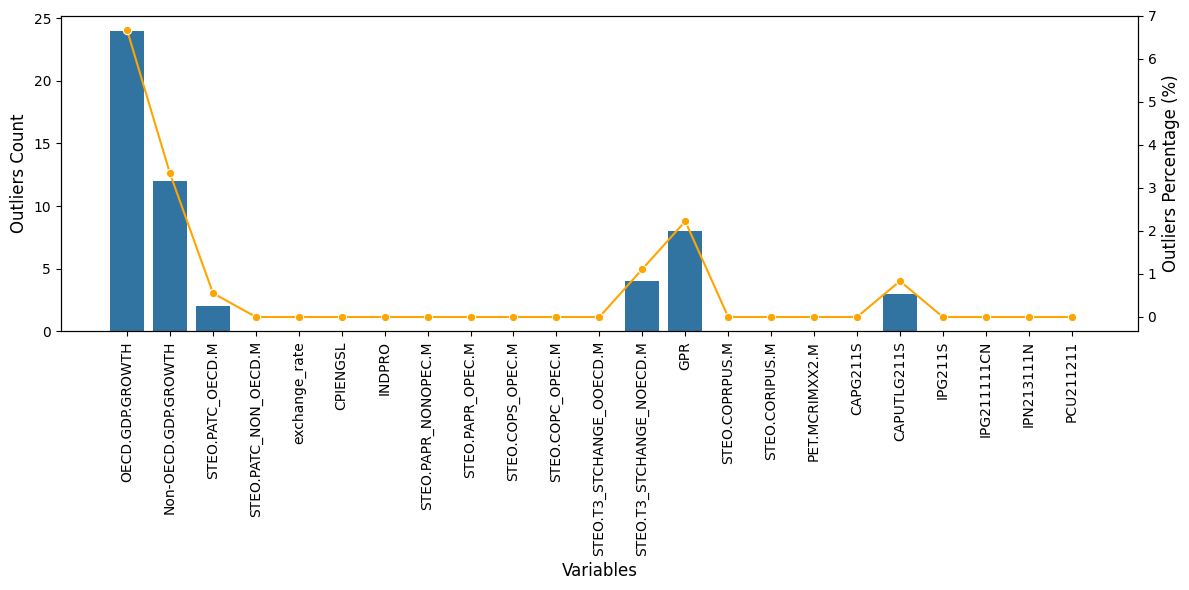

In [13]:
# Function to detect outliers using IQR method
def detect_outliers(df):
    outliers_count = {}
    outliers_percentage = {}
    total_rows = len(df)

    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Only consider numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define the outlier range
            lower_bound = Q1 - 3 * IQR
            upper_bound = Q3 + 3 * IQR

            # Identify outliers and count them
            outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers_count[column] = len(outlier_data)
            outliers_percentage[column] = (len(outlier_data) / total_rows) * 100

    return outliers_count, outliers_percentage

# Detect outliers and count their occurrence in the relevant data
outliers_count, outliers_percentage = detect_outliers(macro_geo_micro_data)

# Convert the outlier counts and percentages to a DataFrame for easy plotting
outlier_df = pd.DataFrame(list(outliers_count.items()), columns=['Variable', 'Outliers Count'])
outlier_df['Outliers Percentage'] = outlier_df['Variable'].map(outliers_percentage)

# Plotting the number of outliers and their percentage using a bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the count of outliers without specifying the palette
sns.barplot(x='Variable', y='Outliers Count', data=outlier_df, ax=ax1)

# Create a secondary axis to plot the percentage of outliers
ax2 = ax1.twinx()
sns.lineplot(x='Variable', y='Outliers Percentage', data=outlier_df, marker='o', color='orange', ax=ax2)

# Adding labels and title
ax1.set_title('')
ax1.set_xlabel('Variables', fontsize=12)
ax1.set_ylabel('Outliers Count', fontsize=12)
ax2.set_ylabel('Outliers Percentage (%)', fontsize=12)

# Rotate the x-axis labels for better readability
ax1.set_xticks(range(len(outlier_df)))
ax1.set_xticklabels(outlier_df['Variable'], rotation=90)
plt.tight_layout()

print(f"{bold_text}      Figure 5: Number and Percentage of extreme outliers for each variable' {reset_format}\n")
plt.show()


Extreme outliers were identified via  the interquartile range (IQR) method with a strict threshold (boundaries: Q1 - 3×IQR and Q3 + 3×IQR), Figure 5.
The approach revealed extreme outliers mostly explain by specific type of crisis:
- Geopolitical Risk Index (GPR): peak in 2001 and 2022 reflecting geopolitical tensions;
- Non-OECD Gross Domestic Product (Non-OECD.GDP.GROWTH); troughs in 2008 and 2020 marking recessions;
- Strategic Petroleum Reserve Changes (STEO.T3_STCHANGE_NOECD.M): COVID-19 related variations;
- Capacity utilization in the oil and gas extraction industry (long-term)
(CAPUTLG211S) with post-crisis falls of 2008;
These outliers, uncorrected, capture real events (crises, wars), considered essential for the analysis of oil shocks.

The numerical summary of the data with the main measures of central tendency, dispersion and range is presented in Table3.

In [14]:
print(f"{bold_text}          Table 3: Summary of data {reset_format}\n")
macro_geo_micro_data.describe().T

          Table 3: Summary of data 



count         mean          std         min  \
OECD.GDP.GROWTH           360.0     2.119563     1.837880   -3.897883   
Non-OECD.GDP.GROWTH       360.0     2.718742     2.443459   -6.594182   
STEO.PATC_OECD.M          360.0    47.247891     2.215432   35.059801   
STEO.PATC_NON_OECD.M      360.0    40.443306    10.496034   24.116678   
exchange_rate             312.0     1.184252     0.155141    0.853167   
CPIENGSL                  360.0   190.944819    58.228942   99.200000   
INDPRO                    360.0    94.451548     8.208665   71.153800   
STEO.PAPR_NONOPEC.M       360.0    56.245322     7.901313   43.167173   
STEO.PAPR_OPEC.M          360.0    31.389250     2.550202   25.763118   
STEO.COPS_OPEC.M          360.0     3.282241     1.683560    0.660000   
STEO.COPC_OPEC.M          360.0    30.421498     1.176779   26.383232   
STEO.T3_STCHANGE_OOECD.M  263.0     0.009907     0.757680   -2.365900   
STEO.T3_STCHANGE_NOECD.M  263.0     0.154556     1.551727  -11.062917   
GPR                       360.0   100.600402    49.320375   39.045624   
STEO.COPRPUS.M            360.0     7.713102     2.704763    3.973586   
STEO.CORIPUS.M            360.0    15.287523     0.936090   12.370929   
PET.MCRIMXX2.M            358.0  3479.382682  1437.693574  336.000000   
CAPG211S                  360.0    86.958046    29.438242   61.482200   
CAPUTLG211S               360.0    94.468506     3.285230   78.636000   
IPG211S                   360.0    82.563805    29.419131   48.814100   
IPG211111CN               360.0   115.115433    35.962131   60.981300   
IPN213111N                360.0   115.105345    28.809123   47.994700   
PCU211211                 360.0   179.260775    80.592148   54.600000   

                                  25%          50%          75%          max  
OECD.GDP.GROWTH              1.820987     2.427798     3.032759     5.921184  
Non-OECD.GDP.GROWTH          1.942653     2.754989     4.182768     6.601726  
STEO.PATC_OECD.M            45.935597    47.244754    48.490546    52.875347  
STEO.PATC_NON_OECD.M        29.934819    40.910417    50.362398    58.213118  
exchange_rate                1.083932     1.174693     1.303195     1.576970  
CPIENGSL                   130.025000   200.828000   236.188000   331.738000  
INDPRO                      90.399700    97.107250   101.217325   104.103800  
STEO.PAPR_NONOPEC.M         49.527025    55.009761    62.919111    71.432773  
STEO.PAPR_OPEC.M            29.158556    32.030459    33.143192    36.095361  
STEO.COPS_OPEC.M             1.982522     2.933800     4.427500     8.220000  
STEO.COPC_OPEC.M            29.795229    30.475500    31.278895    32.666521  
STEO.T3_STCHANGE_OOECD.M    -0.481332     0.038710     0.485772     2.317742  
STEO.T3_STCHANGE_NOECD.M    -0.534475     0.355280     1.004795     3.472694  
GPR                         76.338326    89.767509   111.934097   512.529724  
STEO.COPRPUS.M               5.599746     6.426183     9.521985    13.510967  
STEO.CORIPUS.M              14.614784    15.267032    15.864813    17.665667  
PET.MCRIMXX2.M            2674.000000  3825.500000  4579.250000  5836.000000  
CAPG211S                    64.567075    66.952650   104.748675   151.332400  
CAPUTLG211S                 92.929725    94.327650    96.906775   101.544100  
IPG211S                     60.424300    63.057300    99.940425   147.480400  
IPG211111CN                 85.867900    98.715950   146.165325   196.833100  
IPN213111N                  94.232700   111.056100   132.792600   196.388800  
PCU211211                  112.050000   171.450000   242.650000   490.400000

### **b. Bad data**

### **b.1. Wrong and questionable data**

The outliers have not been corrected as analysis shows that these data are associated with major crises and reflect systemic risks that can impact the price of crude oil (Table 4).

**Table 4: Wrong and questionable data**

| **Type**         | **Dataset ID**          | **Description**                                                                 | **Potential Wrong Data Issues**                                                                 |
|-------------------|--------------------------|---------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **Microeconomic** | `CAPUTLG211S`           | Capacity utilization in the oil and gas extraction industry (long-term)        | **Extreme outliers**: Significant drops in capacity utilization due to economic downturns.        |
| **Geopolitical**  | `GPR`                   | Geopolitical Risk Index                                                        | **Extreme outliers**: Spikes in risk index due to events like the 2001 US terrorism attack or the 2022 Russo-Ukrainian war. |
|                   | `STEO.T3_STCHANGE_NOECD.M` | Strategic petroleum reserve changes in non-OECD countries                     | **Extreme outliers**: Major fluctuations during early COVID-19 pandemic.                |
| **Macroeconomic** | `Non-OECD.GDP.GROWTH`   | Real GDP for non-OECD countries (quarterly, monthly data)                      | **Extreme outliers**: Economic contractions in non-OECD countries due to global downturns.        |
|                   | `OECD.GDP.GROWTH`       | Real GDP for OECD countries (quarterly, monthly data)                          | **Extreme outliers**: Significant GDP fluctuations due to economic shocks or booms.     |


### **b.2. Duplicated data**



In [15]:
# Check for fully duplicated rows (all columns must match)
duplicated_rows = macro_geo_micro_data[macro_geo_micro_data.duplicated(keep=False)]

# Display results
print(f"Number of duplicated rows: {len(duplicated_rows)}")
if not duplicated_rows.empty:
    print("\nDuplicated rows (sorted for inspection):")
    print(duplicated_rows.sort_values(by=macro_geo_micro_data.columns.tolist()))
else:
    print("No fully duplicated rows found.")

Number of duplicated rows: 0
No fully duplicated rows found.


We found no duplicate data.

### **b.3. Missing values**

          Figure 6: Count and proportion of Missing data 



<Axes: >

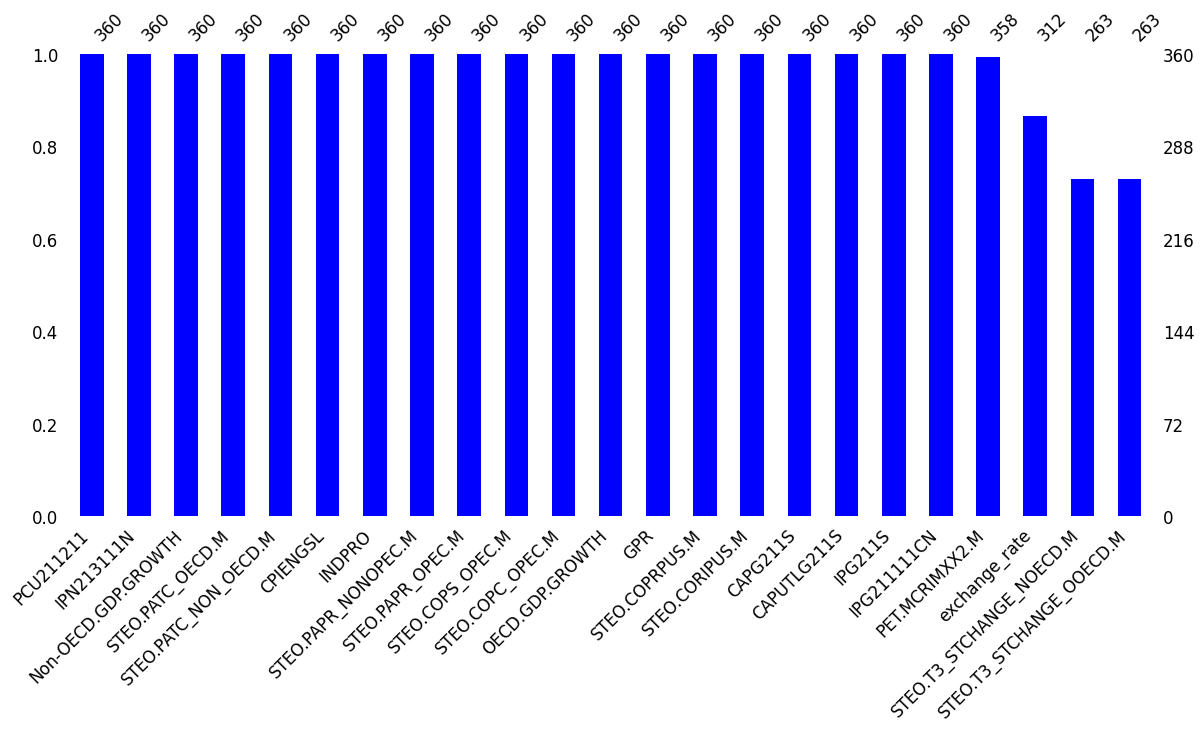

In [16]:
# Visualisation missing data
print(f"{bold_text}          Figure 6: Count and proportion of Missing data {reset_format}\n")
msno.bar(macro_geo_micro_data, figsize=(14,6), fontsize=12, color="blue", sort="descending")


Missing data are visualized in Figure 6. Thus:
- Missing USD/EUR exchange rate from 1995-1998.
- Missing OECD/non-OECD strategic reserves (1995-2003).
- Incomplete oil imports (PET.MCRIMXX2.M) at end-2024.
The Little test (p< 0.00001) confirms non-random missingness, impacting the analysis.

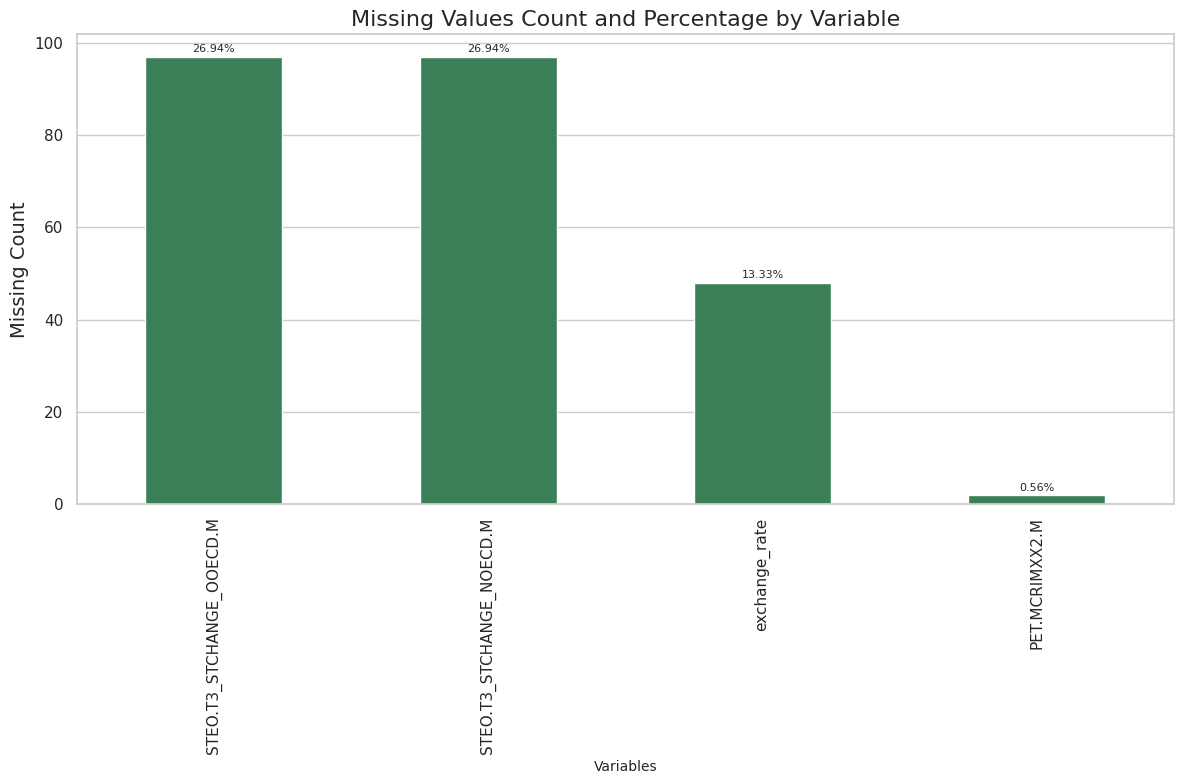

In [17]:
# Set up the plotting style
sns.set(style="whitegrid")

# Calculate missing values count and percentage
missing_values_count = macro_geo_micro_data.isnull().sum()
missing_values_percentage = (macro_geo_micro_data.isnull().mean() * 100).round(2)

# Combine into a DataFrame
missing_values_df = pd.DataFrame({
    'Variable': missing_values_count.index,
    'Missing Count': missing_values_count.values,
    'Missing Percentage (%)': missing_values_percentage.values
})

# Filter out variables with no missing data
missing_values_df = missing_values_df[missing_values_df['Missing Count'] > 0]

# Sort by missing count for better visualization
missing_values_df = missing_values_df.sort_values(by='Missing Count', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Variable', y='Missing Count', data=missing_values_df, color='seagreen', width=0.5)  # Adjust the width here

# Add percentage labels on top of bars
for i, (count, pct) in enumerate(zip(missing_values_df['Missing Count'], missing_values_df['Missing Percentage (%)'])):
    ax.text(i, count + 0.5, f'{pct}%', ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.title('Missing Values Count and Percentage by Variable', fontsize=16)
plt.xlabel('Variables', fontsize=10)
plt.ylabel('Missing Count', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


Period of missing data:
- STEO.T3_STCHANGE_OOECD.M: From 1995 to 2003
- STEO.T3_STCHANGE_NOECD.M: From 1995 to 2003
- exchange_rate: From 1995 to 1998
- PET.MCRIMXX2.M: November and decembre 2024
- STEO.PASC_OECD_T3.M: missing data drom 1995 to january 2003

In [18]:
# merged_df = pd.read_csv('your_dataset.csv')  # Replace with your actual data loading method

# Initialize the MCARTest object
mcar_test = MCARTest(method="little")

# Perform Little's MCAR test
p_value = mcar_test.little_mcar_test(merged_df)

# Display the p-value
print(f"P-value from Little's MCAR test: {p_value}")

# Interpretation
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The data are not Missing Completely at Random (MCAR).")
else:
    print("Fail to reject the null hypothesis: The data are Missing Completely at Random (MCAR).")



P-value from Little's MCAR test: 0.0
Reject the null hypothesis: The data are not Missing Completely at Random (MCAR).


## **Step 6: Sterilized data**

We applied KNN imputation to the covariates. The extreme outliers have not been corrected since these values ​​seem to correspond to periods of crises or major phenomena. We also add crude oil return (oil_price_return) in the dataset.

In [19]:
# Step 1: Apply KNN imputation to the remaining columns
columns_to_impute = merged_df.drop(columns=['forecast_oil_price']) # No need this column now
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(columns_to_impute)

# Step 2: Convert the imputed data back to a DataFrame with date as index
imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute.columns)
imputed_df.index = merged_df.index  # Set the date as the index


# Calculate the percentage change to get the oil price returns
imputed_df['oil_price_return'] = imputed_df['WTISPLC'].pct_change()

# Drop na in oil return
imputed_df = imputed_df.dropna(subset=['oil_price_return'])


<Axes: >

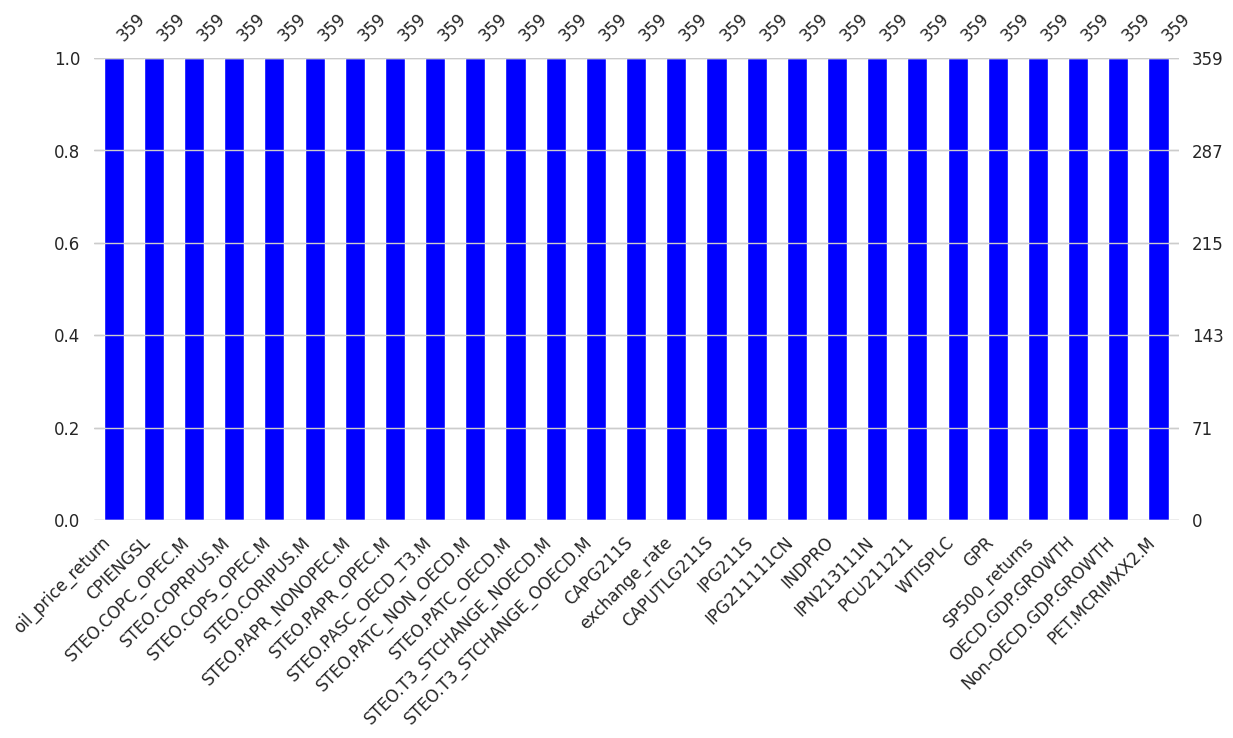

In [20]:
# Looking fo missing data after imputation.
msno.bar(imputed_df, figsize=(14,6), fontsize=12, color="blue", sort="descending")

## **Step 7: Exploratory Data Analysis**

### **a. Distributional plots**

          Figure 7: Histograms of variables with Kurtosis and Skewness 



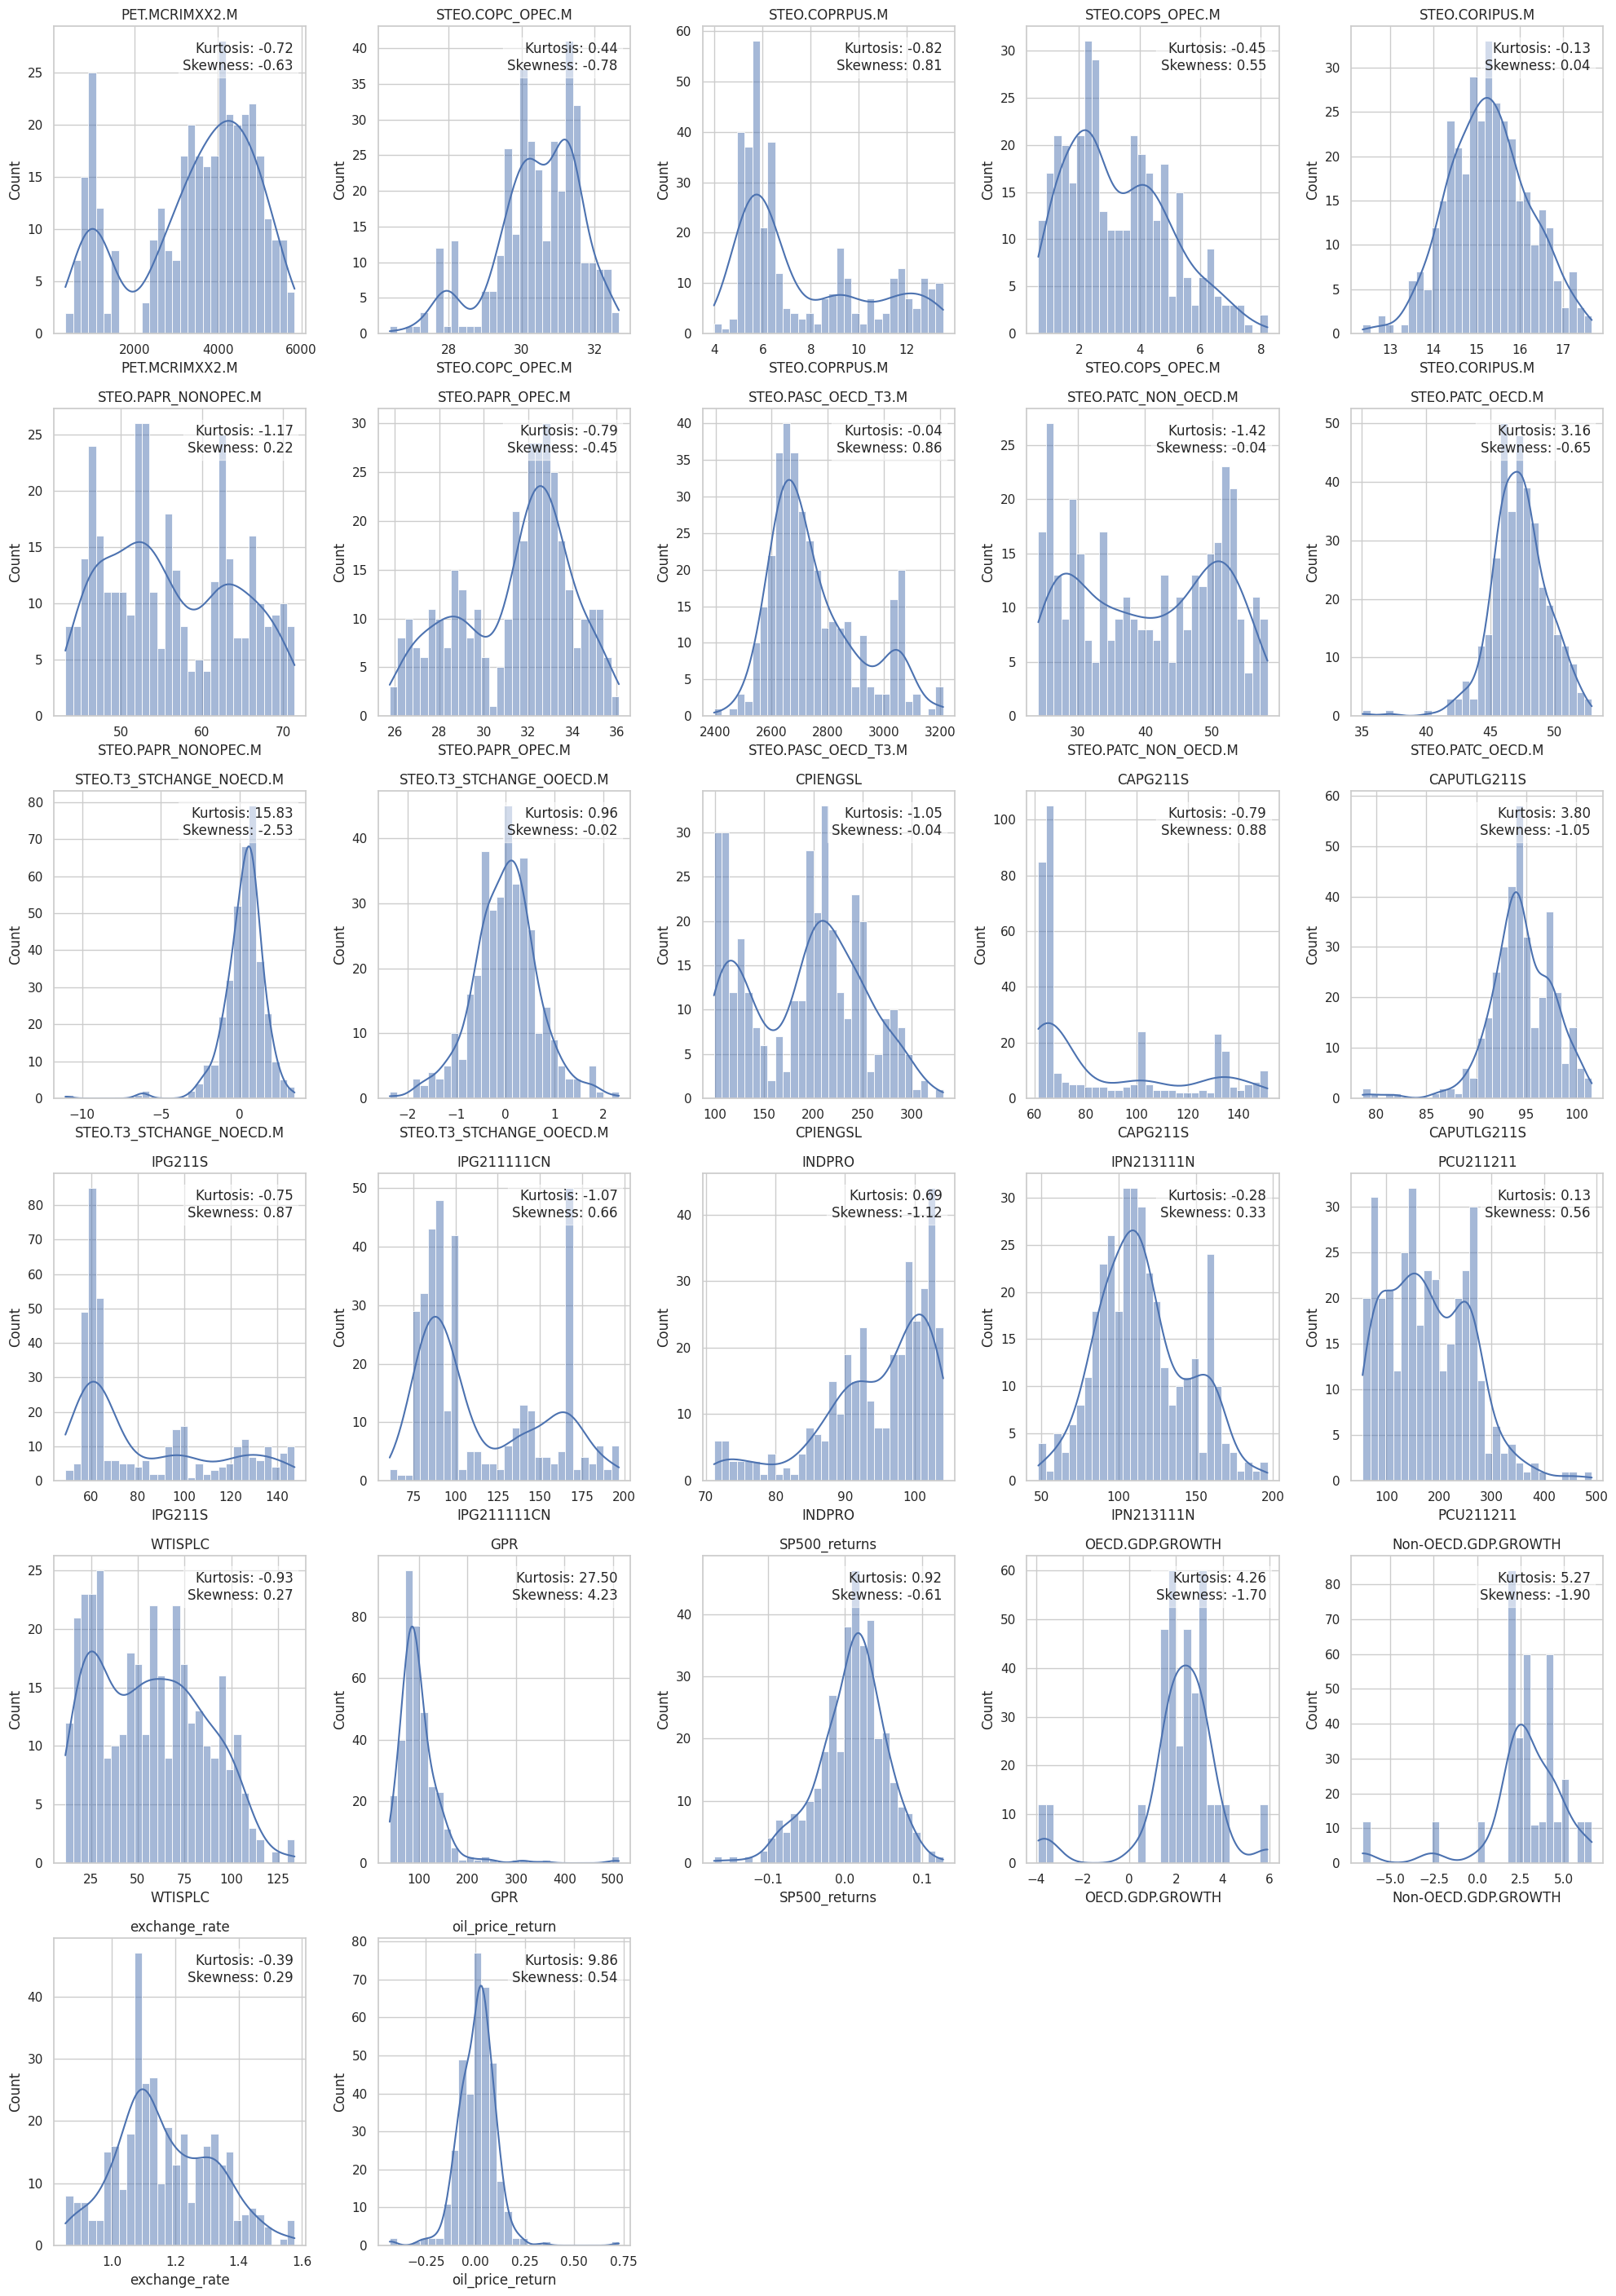

In [21]:
# Calculate kurtosis and skewness for each numerical column
kurtosis_values = imputed_df.select_dtypes(include='number').apply(kurtosis)
skewness_values = imputed_df.select_dtypes(include='number').apply(skew)

# Get the number of numerical columns
num_columns = len(imputed_df.select_dtypes(include='number').columns)

# Calculate the number of rows and columns for the subplot grid
num_rows = math.ceil(num_columns / 5)
num_cols = 5

# Plot histograms for all numerical columns
plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(imputed_df.select_dtypes(include='number').columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(imputed_df[column], bins=30, kde=True)
    plt.title(column)
    plt.text(0.95, 0.95, f'Kurtosis: {kurtosis_values[column]:.2f}\nSkewness: {skewness_values[column]:.2f}',
             transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.5))
plt.suptitle('')
plt.tight_layout(rect=[0, 0, 1, 0.95])

print(f"{bold_text}          Figure 7: Histograms of variables with Kurtosis and Skewness {reset_format}\n")
plt.show()


Figure 7 explores the distribution of variables via histograms, enriched with measures of kurtosis and skewness, revealing key insights on oil and economic dynamics. Most variables are skewed and some have a highly leptokurtic distribution (GRP, GDP). The crude oil price return is leptokurtic with a kurtosis of 9.86.

## **b. Time series plots**

### **b1. Plotting macroeconomic time series data**

          Figure 8: Time series of macroeconomic sterilized data 



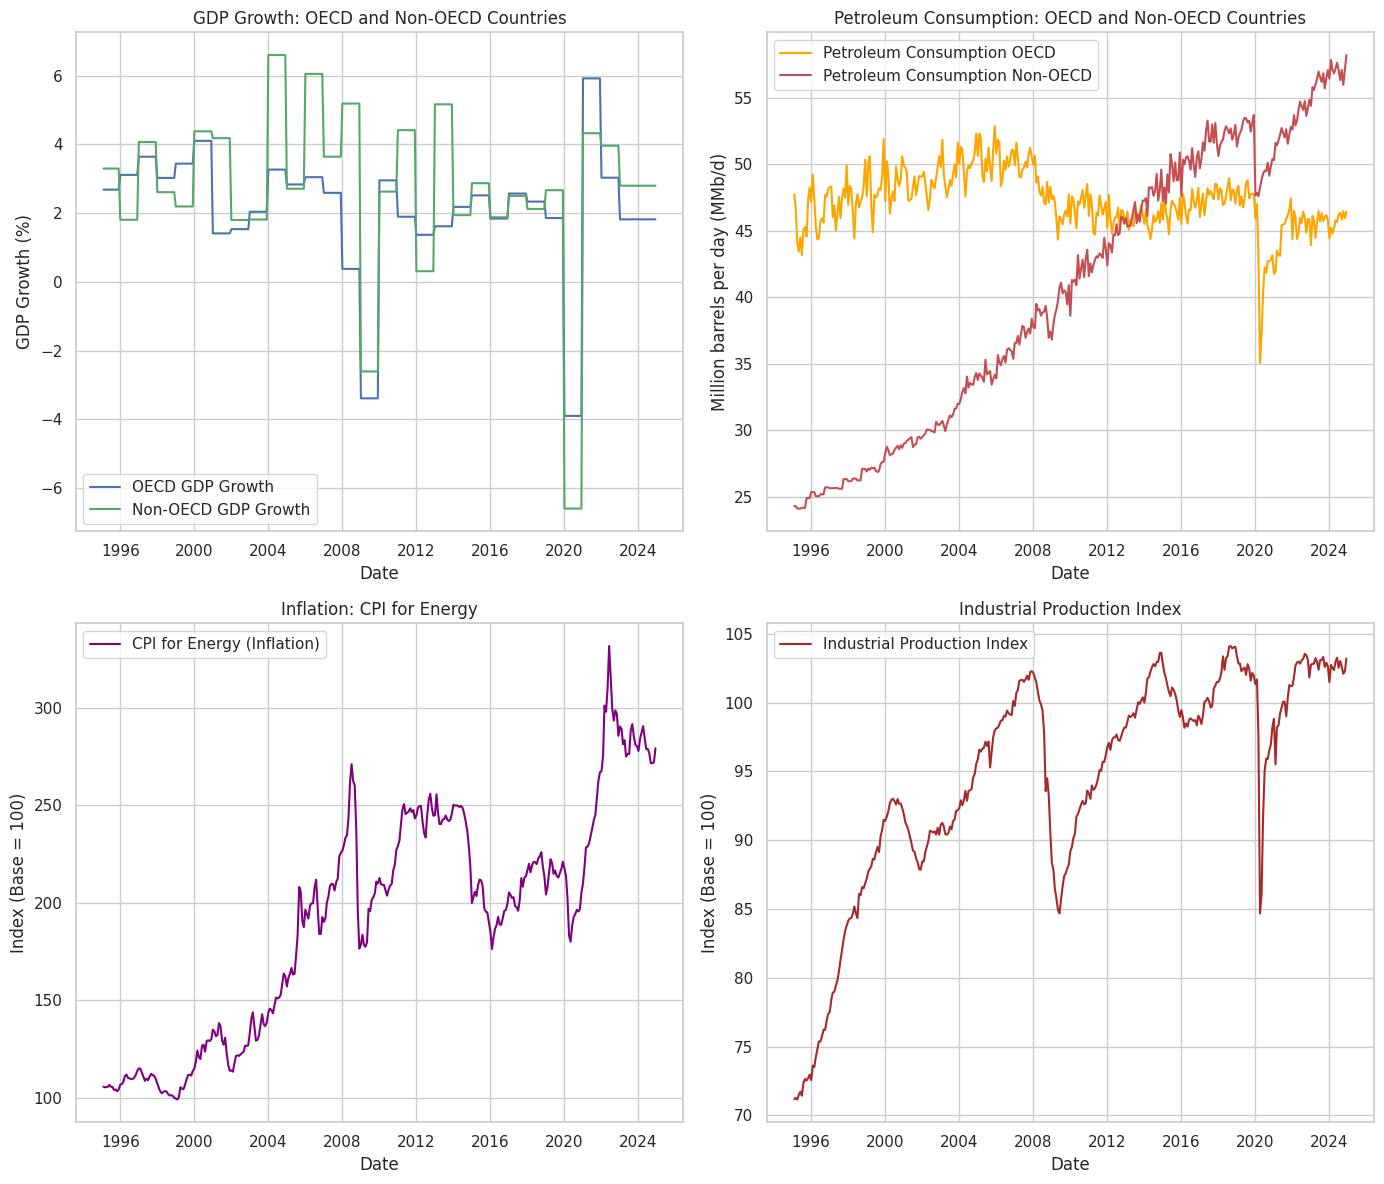

In [22]:
# Create a figure with 2 columns and 2 rows (4 subplots)
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Plot imputed GDP Growth for OECD and Non-OECD in the first subplot
ax[0, 0].plot(imputed_df.index, imputed_df['OECD.GDP.GROWTH'], color='b', label='OECD GDP Growth')
ax[0, 0].plot(imputed_df.index, imputed_df['Non-OECD.GDP.GROWTH'], color='g', label='Non-OECD GDP Growth')
ax[0, 0].set_title('GDP Growth: OECD and Non-OECD Countries')
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('GDP Growth (%)')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Plot imputed Petroleum Consumption in OECD and Non-OECD Countries in the second subplot
ax[0, 1].plot(imputed_df.index, imputed_df['STEO.PATC_OECD.M'], color='orange', label='Petroleum Consumption OECD')
ax[0, 1].plot(imputed_df.index, imputed_df['STEO.PATC_NON_OECD.M'], color='r', label='Petroleum Consumption Non-OECD')
ax[0, 1].set_title('Petroleum Consumption: OECD and Non-OECD Countries')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Million barrels per day (MMb/d)')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Plot Inflation (Consumer Price Index for energy) in the third subplot
ax[1, 0].plot(imputed_df.index, imputed_df['CPIENGSL'], color='purple', label='CPI for Energy (Inflation)')
ax[1, 0].set_title('Inflation: CPI for Energy')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Index (Base = 100)')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Plot Industrial Production Index in the fourth subplot
ax[1, 1].plot(imputed_df.index, imputed_df['INDPRO'], color='brown', label='Industrial Production Index')
ax[1, 1].set_title('Industrial Production Index')
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Index (Base = 100)')
ax[1, 1].legend()
ax[1, 1].grid(True)

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display the plots

print(f"{bold_text}          Figure 8: Time series of macroeconomic sterilized data {reset_format}\n")
plt.show()


Figure 8 shows the macroeconomic time series with cleaned data from 1995 to 2024. The OECD GDP series has a stable trend despite two troughs in 2008 and 2020 related to global financial and health crises. Volatility is significantly higher for GDP in non-OECD countries. For oil consumption, it increases steadily in non-OECD countries and stagnates in OECD countries. There is also a surge in energy inflation in 2008 and 2022.

### **b2. Plotting geopolitical time series data**

          Figure 9: Time series of geopolitical sterilized data 



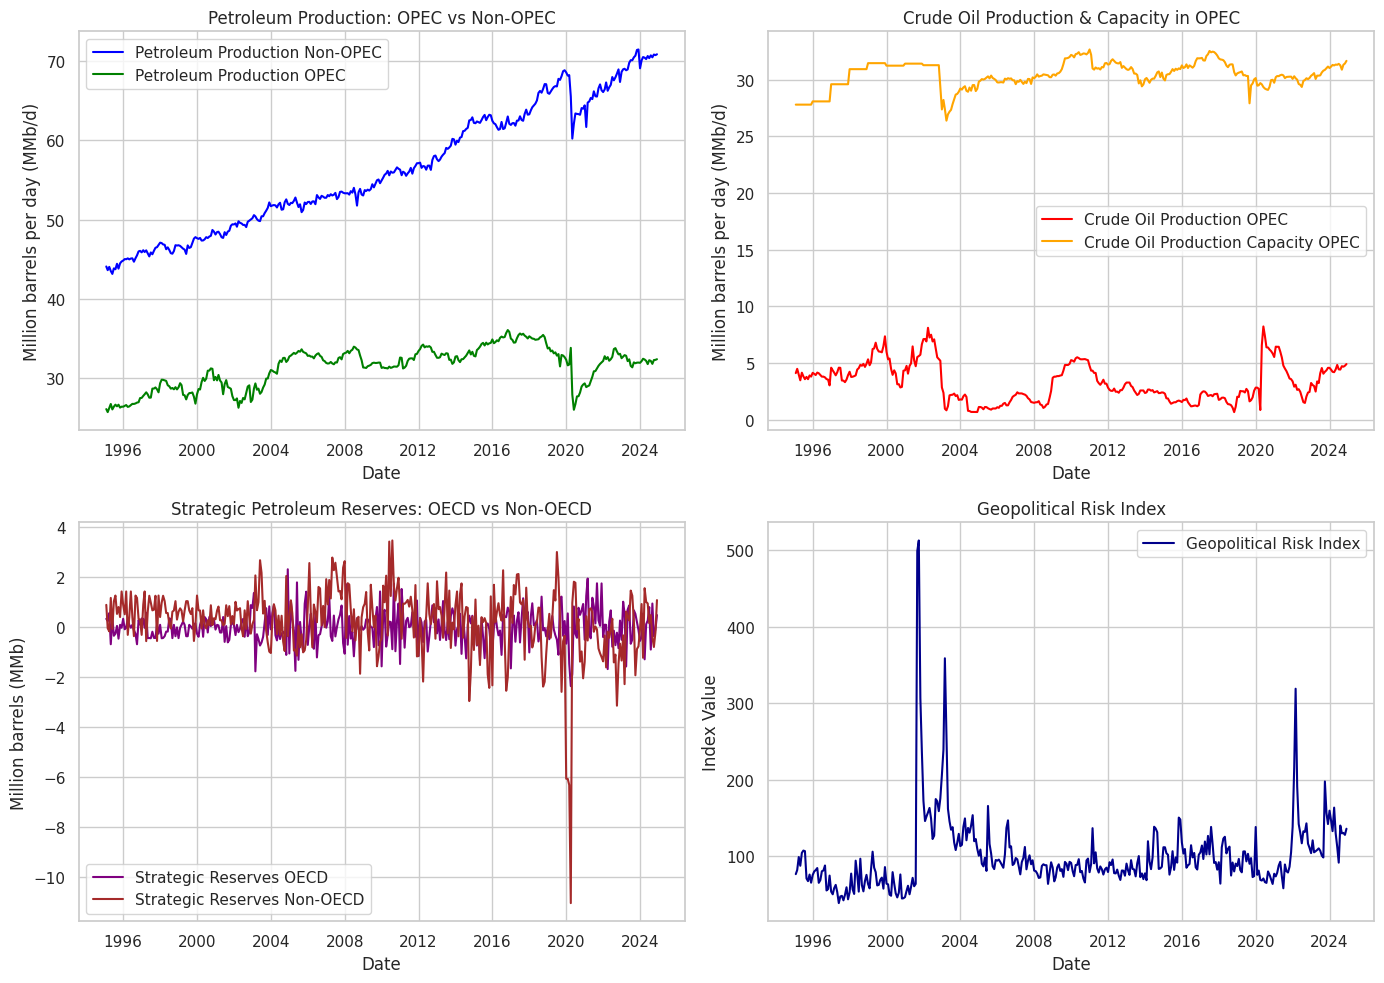

In [23]:
# Create a figure with 2 columns and 2 rows (4 subplots)
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot Petroleum Production (non-OPEC and OPEC) in the first subplot
ax[0, 0].plot(imputed_df.index, imputed_df['STEO.PAPR_NONOPEC.M'], color='blue', label='Petroleum Production Non-OPEC')
ax[0, 0].plot(imputed_df.index, imputed_df['STEO.PAPR_OPEC.M'], color='green', label='Petroleum Production OPEC')
ax[0, 0].set_title('Petroleum Production: OPEC vs Non-OPEC')
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Million barrels per day (MMb/d)')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Plot Crude Oil Production (OPEC countries) in the second subplot
ax[0, 1].plot(imputed_df.index, imputed_df['STEO.COPS_OPEC.M'], color='red', label='Crude Oil Production OPEC')
ax[0, 1].plot(imputed_df.index, imputed_df['STEO.COPC_OPEC.M'], color='orange', label='Crude Oil Production Capacity OPEC')
ax[0, 1].set_title('Crude Oil Production & Capacity in OPEC')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Million barrels per day (MMb/d)')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Plot Strategic Reserves (OECD vs Non-OECD) in the third subplot
ax[1, 0].plot(imputed_df.index, imputed_df['STEO.T3_STCHANGE_OOECD.M'], color='purple', label='Strategic Reserves OECD')
ax[1, 0].plot(imputed_df.index, imputed_df['STEO.T3_STCHANGE_NOECD.M'], color='brown', label='Strategic Reserves Non-OECD')
ax[1, 0].set_title('Strategic Petroleum Reserves: OECD vs Non-OECD')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Million barrels (MMb)')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Plot Geopolitical Risk in the fourth subplot
ax[1, 1].plot(imputed_df.index, imputed_df['GPR'], color='darkblue', label='Geopolitical Risk Index')
ax[1, 1].set_title('Geopolitical Risk Index')
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Index Value')
ax[1, 1].legend()
ax[1, 1].grid(True)

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display the plots
print(f"{bold_text}          Figure 9: Time series of geopolitical sterilized data {reset_format}\n")
plt.show()


Figure 9 shows the geopolitical dynamics related to oil from 1995 to 2024. OPEC countries’ production fluctuates with geopolitical tensions while production capacity largely exceeds actual production. In addition, strategic reserves of non-OECD countries vary greatly as they are impacted by global financial and health crises. The Geopolitical Risk Index (GPR) peaks during major events such as the Russo-Ukrainian war.

### **b3. Plotting microeconomic time series data**

          Figure 10: Time series of microeconomic sterilized data 



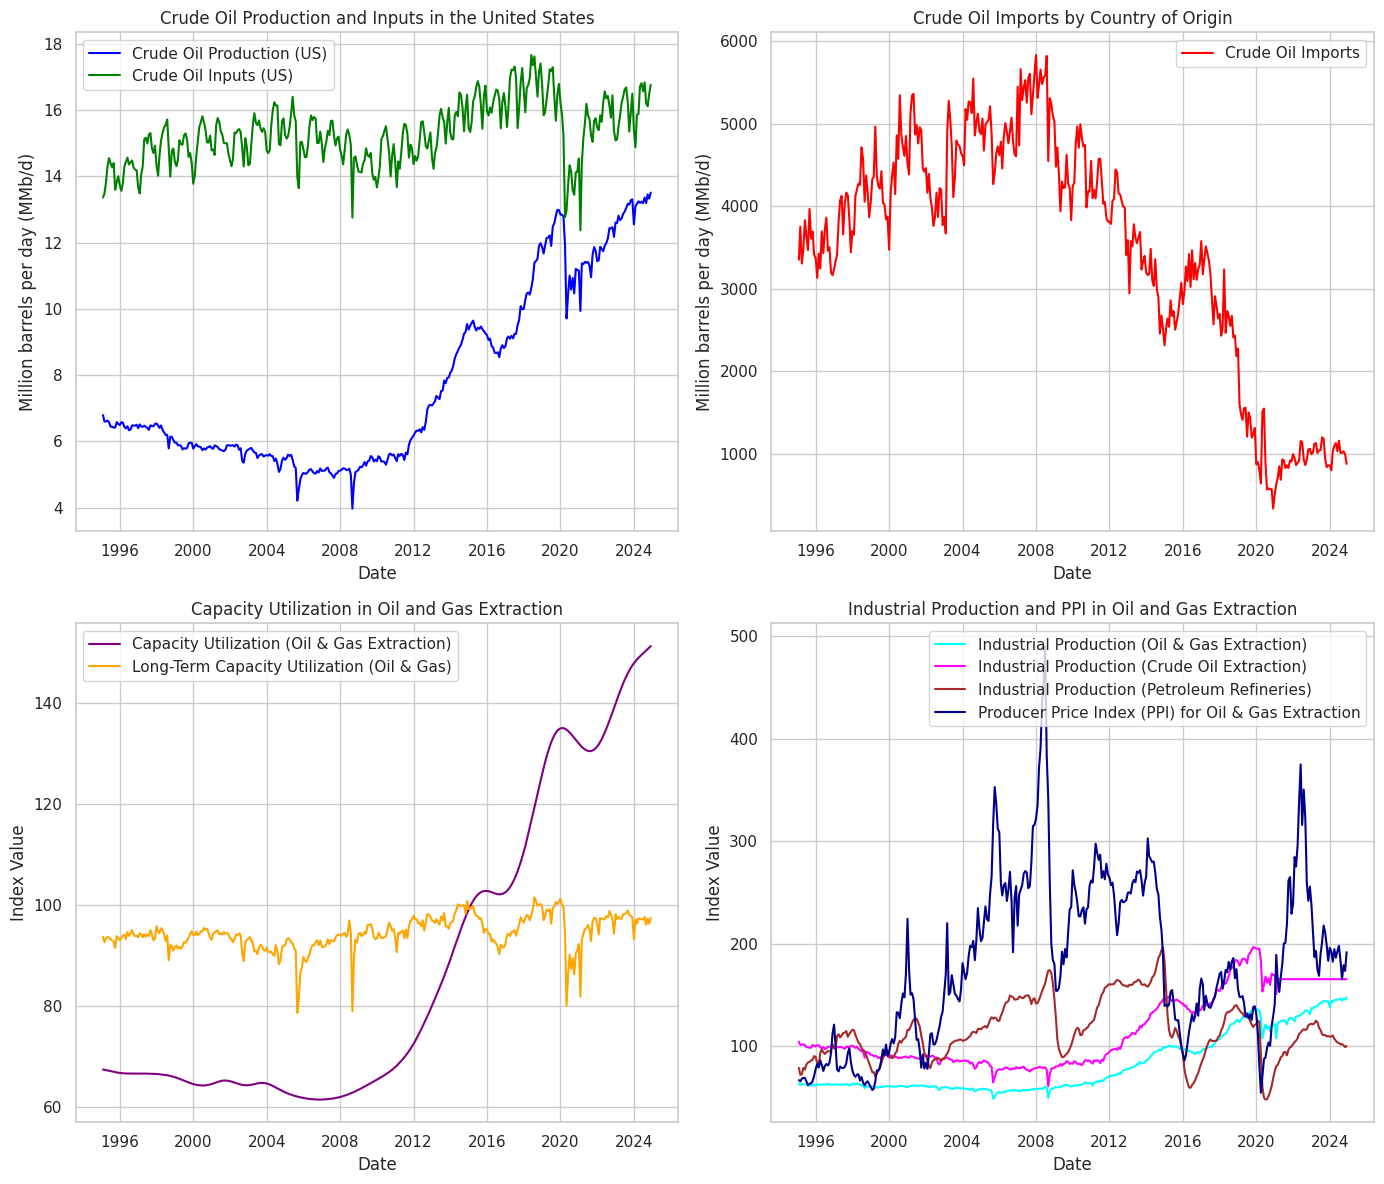

In [24]:
# Create a figure with 2 columns and 2 rows (4 subplots)
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Plot Crude Oil Production and Crude Oil Inputs in the first subplot
ax[0, 0].plot(imputed_df.index, imputed_df['STEO.COPRPUS.M'], color='blue', label='Crude Oil Production (US)')
ax[0, 0].plot(imputed_df.index, imputed_df['STEO.CORIPUS.M'], color='green', label='Crude Oil Inputs (US)')
ax[0, 0].set_title('Crude Oil Production and Inputs in the United States')
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Million barrels per day (MMb/d)')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Plot Crude Oil Imports in the second subplot
ax[0, 1].plot(imputed_df.index, imputed_df['PET.MCRIMXX2.M'], color='red', label='Crude Oil Imports')
ax[0, 1].set_title('Crude Oil Imports by Country of Origin')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Million barrels per day (MMb/d)')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Plot Capacity Utilization in the third subplot
ax[1, 0].plot(imputed_df.index, imputed_df['CAPG211S'], color='purple', label='Capacity Utilization (Oil & Gas Extraction)')
ax[1, 0].plot(imputed_df.index, imputed_df['CAPUTLG211S'], color='orange', label='Long-Term Capacity Utilization (Oil & Gas)')
ax[1, 0].set_title('Capacity Utilization in Oil and Gas Extraction')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Index Value')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Plot Industrial Production and Producer Price Index in the fourth subplot
ax[1, 1].plot(imputed_df.index, imputed_df['IPG211S'], color='cyan', label='Industrial Production (Oil & Gas Extraction)')
ax[1, 1].plot(imputed_df.index, imputed_df['IPG211111CN'], color='magenta', label='Industrial Production (Crude Oil Extraction)')
ax[1, 1].plot(imputed_df.index, imputed_df['IPN213111N'], color='brown', label='Industrial Production (Petroleum Refineries)')
ax[1, 1].plot(imputed_df.index, imputed_df['PCU211211'], color='darkblue', label='Producer Price Index (PPI) for Oil & Gas Extraction')
ax[1, 1].set_title('Industrial Production and PPI in Oil and Gas Extraction')
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Index Value')
ax[1, 1].legend()
ax[1, 1].grid(True)

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display the plots
print(f"{bold_text}          Figure 10: Time series of microeconomic sterilized data {reset_format}\n")
plt.show()


Microeconomic oil data covering the period 1995-2024 are shown in Figure 10. We can note that US production and imports vary according to economic cycles. Capacity utilization (oil extraction) shows a decline after the 2008 crisis and a recovery after COVID. Industrial production indices reflect supply shocks (e.g. 2020 crisis) and increasing demand from refineries.

### **b4. Plotting financial time series data**

          Figure 11: Time series of financial data 



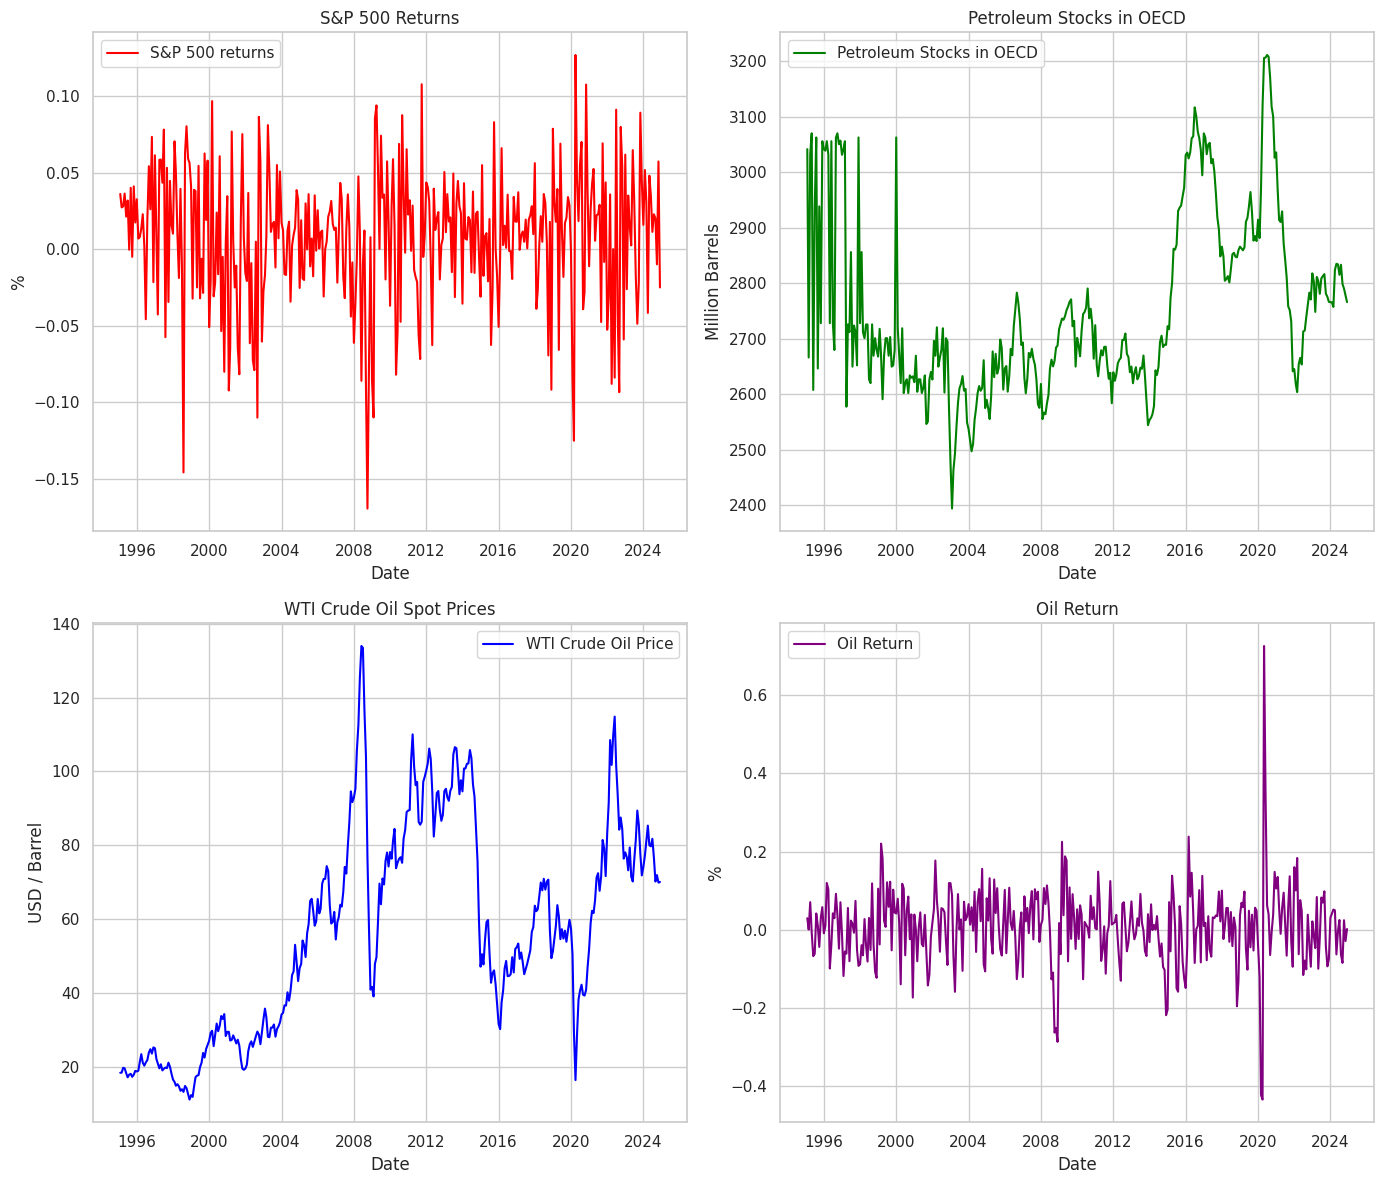

In [25]:
# Create a figure with 2 rows and 2 columns (4 subplots)
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Plot S&P 500 Returns in the first subplot
ax[0, 0].plot(imputed_df.index, imputed_df['SP500_returns'], color='red', label='S&P 500 returns')
ax[0, 0].set_title('S&P 500 Returns')
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('%')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Plot Petroleum Stocks in the second subplot
ax[0, 1].plot(imputed_df.index, imputed_df['STEO.PASC_OECD_T3.M'], color='green', label='Petroleum Stocks in OECD')
ax[0, 1].set_title('Petroleum Stocks in OECD')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Million Barrels')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Plot WTI Crude Oil Price in the third subplot
ax[1, 0].plot(imputed_df.index, imputed_df['WTISPLC'], color='blue', label='WTI Crude Oil Price')
ax[1, 0].set_title('WTI Crude Oil Spot Prices')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('USD / Barrel')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Plot Oil Price Return in the fourth subplot
ax[1, 1].plot(imputed_df.index, imputed_df['oil_price_return'], color='purple', label='Oil Return')
ax[1, 1].set_title('Oil Return')
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('%')
ax[1, 1].legend()
ax[1, 1].grid(True)

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display the plots
print(f"{bold_text}          Figure 11: Time series of financial data {reset_format}\n")
plt.show()


Financial data (1995-2024) are shown in Figure 4. S&P500 returns show high volatility during the 2008 and COVID19 crises. The variation in the price of WTI crude oil indicates the presence of peaks and crashes. S&P 500 returns show increased volatility during crises (2008, COVID). WTI oil price experiences peaks (2008, 2022) and crashes (2020). OECD oil stocks track supply shocks. Oil return shows relatively marked volatility with major peaks in 2008 and 2020.

### **c. Multivariate plots (Heatmap of Correlations)**

          Figure 12: Correlation Heatmap on sterilized data 



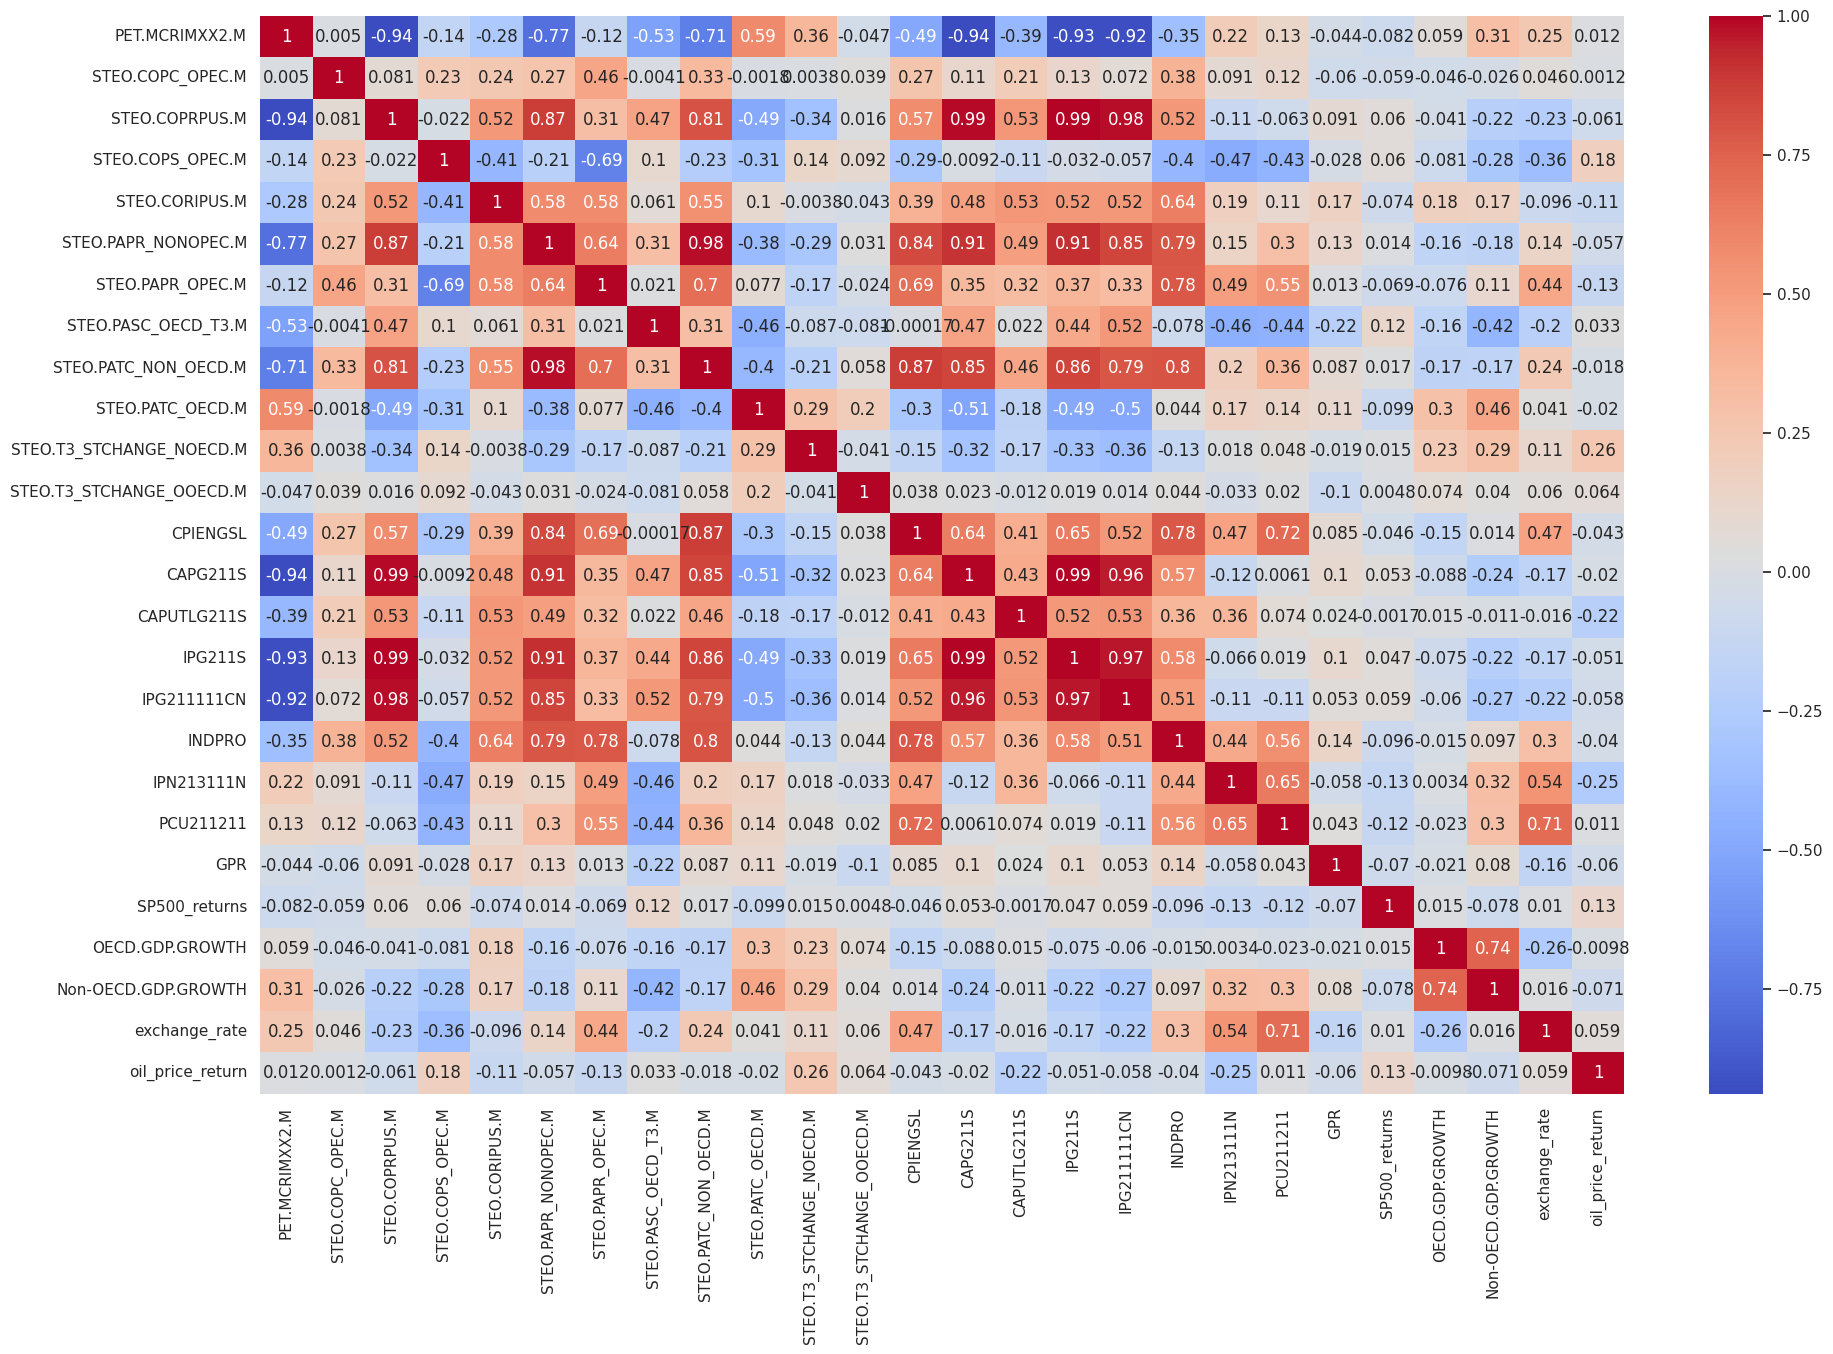

In [26]:
# Select the relevant columns from the DataFrame
selected_columns = ['PET.MCRIMXX2.M', 'STEO.COPC_OPEC.M', 'STEO.COPRPUS.M',
                     'STEO.COPS_OPEC.M', 'STEO.CORIPUS.M', 'STEO.PAPR_NONOPEC.M',
                     'STEO.PAPR_OPEC.M', 'STEO.PASC_OECD_T3.M', 'STEO.PATC_NON_OECD.M',
                     'STEO.PATC_OECD.M', 'STEO.T3_STCHANGE_NOECD.M', 'STEO.T3_STCHANGE_OOECD.M',
                     'CPIENGSL', 'CAPG211S', 'CAPUTLG211S', 'IPG211S', 'IPG211111CN',
                     'INDPRO', 'IPN213111N', 'PCU211211', 'GPR', 'SP500_returns',
                     'OECD.GDP.GROWTH', 'Non-OECD.GDP.GROWTH', 'exchange_rate', "oil_price_return"]

plt.figure(figsize=(22, 14))
sns.heatmap(imputed_df[selected_columns].corr(), annot=True, cmap='coolwarm')
#plt.title('')

print(f"{bold_text}          Figure 12: Correlation Heatmap on sterilized data {reset_format}\n")
plt.show()


The correlation heatmap shows a complex correlation between the variables. Some variables are strongly positively or negatively correlated while others are very weakly or not at all correlated. The crude oil price performance is very weakly correlated or not correlated with almost all the variables. The strongest correlation of this variable is with the change in strategic reserves (r = 0.26). These complex relationships between the variables demonstrate the usefulness of models that can capture this complexity for modeling oil prices.

## **Step 8: Facts on oil returns**

### **a. Why Oil Prices Stand Out: Spikes, Volatility Clusters, and Seasonality**

In [27]:
from statsmodels.tsa.stattools import adfuller

# Assume `returns` is your time series
result = adfuller(imputed_df.oil_price_return)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("The series is stationary (reject the null hypothesis).")
else:
    print("The series is not stationary (fail to reject the null hypothesis).")


ADF Statistic: -13.003187953091187
p-value: 2.6608757243890834e-24
Critical Values: {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
The series is stationary (reject the null hypothesis).


Oil prices experience spikes (e.g. 2008, 2022), clustered volatility and potentially seasonality not evident in oil price curves and returns. Oil prices are heavily influenced by:
- geopolitical shocks (wars, decisions by oil exporting countries);
- supply-demand imbalances (COVID-19 demand collapse, significant increase in shale production);
- storage constraints (negative prices in 2020);
- The series of oil return is stationary according to Augmented Dickey-Fuller (ADF) Test; this contrasts with other financial series which are often non-stationary.

These factors create abrupt and asymmetric reactions absent from most financial assets.

### **b. Distributions of oil returns**

Oil returns follow a non-normal, leptokurtic distribution (kurtosis >3) with slight positive skewness (0.54).

### **c. Autocorrelation in oil returns**

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

          Figure 13: Autocorrelation Function (ACF) of Oil Returns 



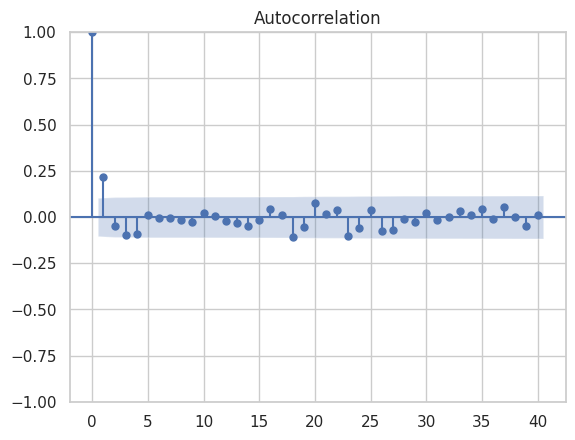

In [29]:
# Plot ACF
plot_acf(imputed_df.oil_price_return, lags=40, alpha=0.05)  # lags=40: Check up to 40 lags
#plt.title("Autocorrelation Function (ACF) of Oil Returns")
print(f"{bold_text}          Figure 13: Autocorrelation Function (ACF) of Oil Returns {reset_format}\n")
plt.show()

The lag at lag 1 shows a positive and significant autocorrelation. Beyond lag 1, the autocorrelation values ​​are within the confidence limits. These results indicate some short-run dependence and limited long-run dependence of oil yields. Thus, oil yields appear unpredictable beyond short-run movements. This underlines the stochastic nature of oil market dynamics (Figure 13).

          Figure 14: Partial Autocorrelation Function (PACF) of Oil Returns 



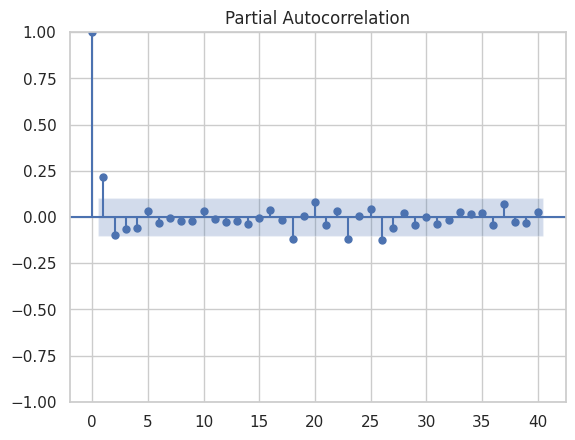

In [30]:
# Plot PACF
plot_pacf(imputed_df.oil_price_return, lags=40, alpha=0.05)  # lags=40: Check up to 40 lags
#plt.title("Partial Autocorrelation Function (PACF) of Oil Returns")
print(f"{bold_text}          Figure 14: Partial Autocorrelation Function (PACF) of Oil Returns {reset_format}\n")
plt.show()

The partial autocorrelation plot also indicates short-term dependence (lag 1) and no long-term dependence (partial autocorrelation within confidence limits beyond lag 1, figure 14.

In [31]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test
lb_test = acorr_ljungbox(imputed_df.oil_price_return, lags=20)  # Test up to 20 lags
print(lb_test)

      lb_stat  lb_pvalue
1   16.608406   0.000046
2   17.412976   0.000166
3   20.738094   0.000119
4   23.742390   0.000090
5   23.766862   0.000241
6   23.774778   0.000574
7   23.780133   0.001245
8   23.911914   0.002371
9   24.222083   0.003964
10  24.433639   0.006529
11  24.455052   0.010945
12  24.636845   0.016641
13  25.043052   0.022785
14  26.030141   0.025659
15  26.115361   0.036827
16  26.767683   0.044139
17  26.817978   0.060792
18  31.239157   0.027006
19  32.291186   0.028974
20  34.391336   0.023596


The Ljung-Box Test indicates autocorrelation until lag 20.

### **d. Other stylized facts about oil prices**

- Volatility increases more after a price drop
- Macro-geopolitical sensitivity
- Jumps: discontinuous price movements

## **Step 9: Model**

### **a. Student A: Probabilistic Graphical Models (PGMs)(Larrañaga et al.; Pernkopf et al.)**

Probabilistic Graphical Models(PGMs) are a framework that comes about as a combination of the probability theory and the graph theory to help in modeling systems that have multiple variables and interdependencies. These models are created to provide compact and intuitive representations of joint probability distributions which enables efficient reasoning and decision making which is effective under periods of uncertainty. Probabilistic Graphical Models become useful in addressing problems where the relationship between the variables is complex and the data is also incomplete, noisy, or needs to be cleaned.
Probabilistic Graphical Models play an integral role in the field of machine learning, artificial intelligence, and data science. They have the ability to capture dependencies and interdependencies between or among variables which makes them essential tools for tasks like predictive modeling (forecasting demand or diagnosing diseases), decision-making under uncertainty (autonomous systems), and learning relationships from data.
Because of the dual strength of the graphs and the probability, Probabilistic Graphical Models can compactly represent systems while retaining computational efficiency.
Types of Probabilistic Graphical Models
Bayesian Networks (Belief Networks): Here, nodes represent random variables and the edges indicate direct interdependencies which often capture casual relationships. Each node in the Bayesian Network is associated with a conditional probability distribution which specifies how the variable depends on the parent node or the relationship between the variable and the parent node. This Bayesian Network is particularly effective or useful for handling missing data and reasoning of casual relationships. Let’s assume we have a medical diagnostic system. In this scenario, the nodes can be represented as the diseases and symptoms, and the edges represent the causal links between them.
Markov Networks (Markov Random Fields): With Markov Networks, nodes represent random variables but the edges represent the symmetrical dependencies between variables. Unlike how the Bayesian network works, the Markov networks do not not impose directionality on relationships which makes them suitable for modeling undirected dependencies such as correlations.
Features of Probabilistic Graphical Models
Represents Independence: Explicitly, Probabilistic Graphical Models encode independencies among the various variables which helps to reduce the complexity of the probabilistic computations. With the Bayesian Networks, independencies are based on the parent-child relationship as earlier shared. With the Markov Networks, independencies are based on the graph separation.
Learning Ability: Probabilistic Graphical Models can learn from the data which involves discovering the graph structure that best represents the dependencies in the data or estimating the clique potentials.
Distinction between Belief Network and Markov Networks
Bayesian Networks use directed graphs, whereas Markov Networks use undirected graphs.
In contrast to Markov Networks, all Bayesian Networks explicitly model causal relationships between variables.
Bayesian Networks represent probability explicitly using Conditional Probability Distributions (CPDs), while Markov Networks implicitly represent probability using clique potentials.
Bayesian Networks use parent-child relationships and d-separation to determine independence. Markov Networks used the important property of graph separation, employing the precise paths between nodes, to rigorously define independence.
Bayesian Networks excel at modeling cause-and-effect relationships. They are also superb for making decisions under uncertainty. Markov Networks are superb for modeling correlations and they are also well-suited for symmetrical, undirected relationships.

### **b. Student B: Parameter Learning and Structure Learning (Pernkopf and Bilmes; Wang et al.)**

Parameter learning finds the optimal values that govern the relationships within a probabilistic graphical model. In Bayesian Networks, these parameters are fundamentally probabilities; in Markov Networks, they are, instead, meaningful potentials. Observed data will be used to determine appropriate parameter values, thus guaranteeing realistic model behavior.
Steps for learning necessary parameters
Parameter learning initiates with a large quantity of data, frequently a complete dataset of all observed variables. Sufficient quality and a sufficient quantity of data are both important for reliable parameter estimation.
Sufficient data availability determines the optimal learning method.
Complete variable observation is often necessary. Maximum likelihood estimation and Bayesian estimation are frequently used in these cases.
Severely incomplete data considerably obstructs thorough analysis; therefore, methods such as Expectation-Maximization iteratively estimate missing values and parameters.
Parameter tuning in the learning process maximizes the likelihood of observed data which ensures that output models reflect the real-world patterns.
An illustration of a Bayesian network
Structure learning would entail figuring out whether the presence of an umbrella is directly influenced by the weather or if both factors have an impact on the wet ground using a dataset that contains variables like "Weather", "Umbrella," and "Wet Ground.".
Key distinctions between Parameter learning and Structure Learning
Parameter learning adjusts a model's settings, while structure learning determines how its variables relate.
Parameter learning requires a known structure to estimate probabilities or potentials, while structure learning uses the data to find the model's structure.
Parameter learning uses Maximum Likelihood Estimation (MLE) and Bayesian Estimation and it also uses the Expectation-Maximization (EM) Algorithm. Structure learning finds all dependencies using constraint-based, score-based, or hybrid methods.
Detailed parameter learning yields precise probabilities or potentials that definitively define model behavior; thorough structure learning defines the graph's topology providing thorough connections between the variables.
In parameter learning, all graph structures are predefined while structure learning methods require no prior structural knowledge.
Parameter learning faces hardships with overfitting and limited data and structure learning is computationally expensive and susceptible to local optima.

### **C. Student C: Markov Chains and Markov Blankets (Bruineberg et al.; Liu and Liu)**

Markov Chains: This is used to describe the sequence of events where the probability of each event or situation will depend solely on the state of the previous one. So for one event to happen, it will solely depend on the previous one.
In the world of finance, the Markov Chains is used to predict stock price movement and even credit ratings as the previous one can help determine the future one.
Also, in weather forecasting, weather transitions can or are predicted based on historical data or previous data. So for instance in a weather forecast model, if today happens to be sunny, there can be a higher chance that the next day will be sunny in the morning and later a chance of rain late in the day. This can be mapped as a transition matrix which can help in prediction about the future states.

Markov Blankets: This represents a set of nodes in a probabilistic graphical model that renders a specific node conditionally independent from other nodes in the same network. There are components that form the Markov Blanket and they are:
Parents: theses are nodes that have a direct influence on the node
Children: these are nodes that are directly influenced by the node
Co-Parents: these are nodes that share the same children with the selected node
Markov blankets let you efficiently analyze large, complex networks by focusing only on the most important nodes. Grasping the Markov blanket of a node in Bayesian Networks is important because it reveals all and only the factors that affect or are affected by that node.
Markov Chains and Markov Blankets
Markov Chains precisely describe how all sequential processes evolve over time or space.
Markov Blankets simplify static networks. They identify the smallest set of nodes that affect a given node, isolating the relevant variables.
Time-series prediction uses Markov chains and feature selection uses Markov blankets.

## **Step 10: Pseudocode version of Algorithm1**

Pseudocode
Algorithm InferredCausality(Data):
    Input: Data - A dataset with observed variables
    Output: CausalGraph - A graphical representation of causal relationships


    Step 1: Initialize
    Begin by initializing several parameters. This is the first step in the process.
    An empty graph G should be created; its nodes will represent each variable in Data. For all statistical importance thresholds, set each threshold ε to 0.05.


    Step 2: The second phase concludes with execution of all Markov Blanket Learning procedures.
    Considering each node X within graph G:
        1. Find all variables in the Markov blanket of X.
           - Include Parents: Variables that directly influence X
           - Include Children: Variables directly influenced by X
           - Include Co-Parents: Variables that share children with X
        2. Determine subject dependencies and perform strict statistical tests such as conditional independence tests.
        3. Add edges to G between X and every node in X's Markov blanket.


    Step 3: Learning parameters is the third step
    Consider each edge (X, Y) in graph G and this is relevant to the analysis.:
        1. Approximate P(Y | X) and use this approximation.:
           - Maximum likelihood estimation
           - Bayesian inference
        2. Considerably update all edge weights using the learned parameters.


    Step 4: Several Important Learning Structures
    A scoring function evaluates possible structures. BIC is an example of such a function.:
        1. Candidate graphs are generated by adding, deleting, or reversing edges.
        2. The graph structure possesses the considerably highest score; therefore, retain that structure
        3. All Bayesian networks require acyclic structures, while all Markov networks should be looped

    Step 5: Use Markov Chains for Sequential Dependencies
    When data include sequential information:
        1. Creating a transition probability matrix carefully is therefore necessarys
        2. Observed sequences provide several important data points. These data allow for the accurate estimation of transition probabilities.
        3. Sequentially update each of the graph's relationships.

    Step 6: Validate and refine the results thoroughly and carefully.
    Strict validation of causal relationships is analytically important and including intervention data, when available, considerably improves this validation:
        1. Substantially intervene to explore the cause-effect relationship.
        2. Thoroughly test this relationship using do-calculus, for example.Refine graph structure inference considerably using the observations.

    Step 7: Output Causal Graph
    Return G as the inferred CausalGraph

End Algorithm

## **References**

Alvi, Danish A. Application of Probabilistic Graphical Models in Forecasting Crude Oil Price. arXiv:1804.10869, arXiv, 29 Apr. 2018. arXiv.org, https://doi.org/10.48550/arXiv.1804.10869.

Bruineberg, Jelle, et al. “The Emperor’s New Markov Blankets.” Behavioral and Brain Sciences, vol. 45, Jan. 2022, p. e183. Cambridge University Press, https://doi.org/10.1017/S0140525X21002351.

Larrañaga, Pedro, et al. “A Review on Probabilistic Graphical Models in Evolutionary Computation.” Journal of Heuristics, vol. 18, no. 5, Oct. 2012, pp. 795–819. Springer Link, https://doi.org/10.1007/s10732-012-9208-4.

Liu, Xu-Qing, and Xin-Sheng Liu. “Markov Blanket and Markov Boundary of Multiple Variables.” Journal of Machine Learning Research, vol. 19, no. 43, 2018, pp. 1–50.

Pernkopf, Franz, et al. “Chapter 18 - Introduction to Probabilistic Graphical Models.” Academic Press Library in Signal Processing, edited by Paulo S. R. Diniz et al., vol. 1, Elsevier, 2014, pp. 989–1064. ScienceDirect, https://doi.org/10.1016/B978-0-12-396502-8.00018-8.

Pernkopf, Franz, and Jeff Bilmes. “Discriminative versus Generative Parameter and Structure Learning of Bayesian Network Classifiers.” Proceedings of the 22nd International Conference on Machine Learning, Association for Computing Machinery, 2005, pp. 657–64. ACM Digital Library, https://doi.org/10.1145/1102351.1102434.

Wang, William Yang, et al. “Structure Learning via Parameter Learning.” Proceedings of the 23rd ACM International Conference on Conference on Information and Knowledge Management, Association for Computing Machinery, 2014, pp. 1199–208. ACM Digital Library, https://doi.org/10.1145/2661829.2662022.
